In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import compression as C
import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline

ValueError: Attempted relative import in non-package

In [2]:
ac3 = C.Util.load_data('ac3', 5, '/Volumes/FFRITZ/cs222/ac3/rhoana/')

NameError: name 'C' is not defined

In [3]:
C.Util.get_size(ac3) / 1000**2

NameError: name 'C' is not defined

In [4]:
ac3.shape

(2, 1024, 1024)

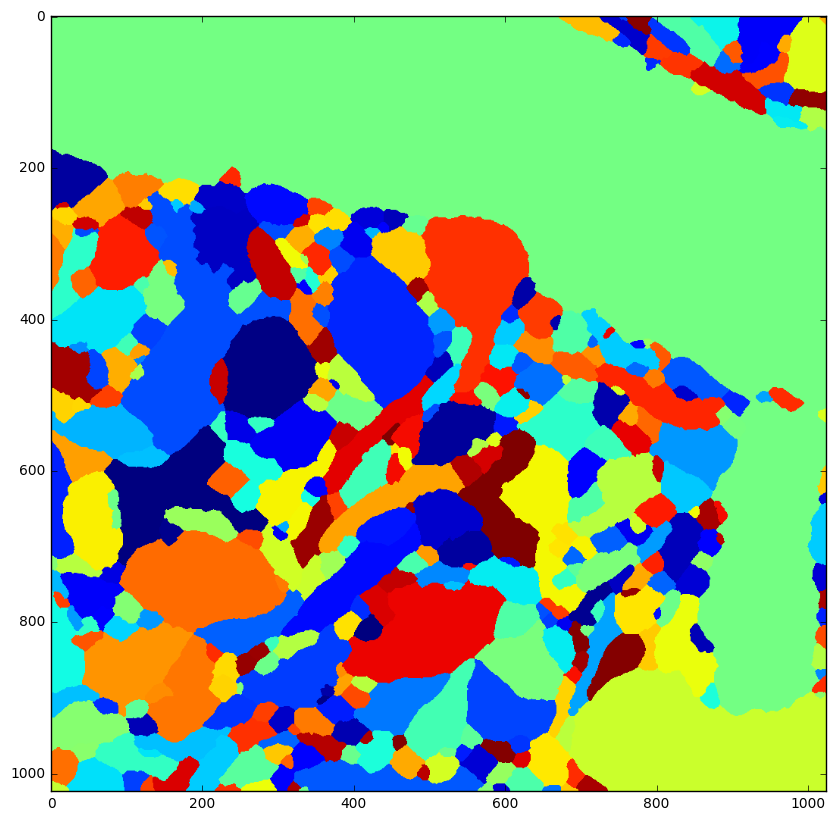

In [5]:
C.Util.adj_fig_size(10,10)
imshow(ac3[0])

In [51]:
print np.array_equal(C.RLE2D.decode(C.RLE2D.encode(ac3[0])), ac3[0])
print np.array_equal(C.RLE3D.decode(C.RLE3D.encode(ac3[0:1])), ac3[0:1])
print np.array_equal(C.RLE.decode(C.RLE.encode(ac3[0])), ac3[0])
print np.array_equal(C.RLE.decode(C.RLE.encode(ac3[0:1])), ac3[0:1])

True
True
True
True


In [42]:
C.RLE3D.decode(C.RLE3D.encode(ac3[0:1]))

array([[[3036, 3036, 3036, ..., 4458, 4458, 4458],
        [3036, 3036, 3036, ..., 4458, 4458, 4458],
        [3036, 3036, 3036, ..., 4458, 4458, 4458],
        ..., 
        [3631, 3631, 3631, ..., 3669, 3669, 3669],
        [3631, 3631, 3631, ..., 3669, 3669, 3669],
        [3631, 3631, 3631, ..., 3669, 3669, 3669]]], dtype=uint64)

In [14]:
bytes, com_r, com_s, dcom_s, enc_s, dec_s = C.Util.benchmark(C.LZMA, C.NE, ac3[0], N=2)
bytes, com_r, com_s, dcom_s, enc_s, dec_s = C.Util.benchmark(C.LZMA, C.RLE, ac3[0], N=2)

LZMA: 290.062517289
Compression Method: LZMA
Encoding Method: NE
Input Size: 8.388608 MB
Output Size: 0.02892 MB
Ratio: 290.062517289
Compression Speed [MB/s]: 18.2459663891
Decompression Speed [MB/s]: 1.31715319116
Encoding Speed [MB/s]: 3518437.20888
Decoding Speed [MB/s]: 15162.40896
LZMA: 545.423146944
Compression Method: LZMA
Encoding Method: RLE
Input Size: 8.388608 MB
Output Size: 0.01538 MB
Ratio: 545.423146944
Compression Speed [MB/s]: 42.0940467162
Decompression Speed [MB/s]: 4.20332283313
Encoding Speed [MB/s]: 141.570204297
Decoding Speed [MB/s]: 0.474429346954


In [15]:
b, r, e, d = C.Util.benchmark(C.BROTLI, ac3, N=1)
b, r, e, d = C.Util.benchmark(C.BZ2, ac3, N=2)
b, r, e, d = C.Util.benchmark(C.FFMPEG, ac3, N=1)
b, r, e, d = C.Util.benchmark(C.LZMA, ac3, N=1)
b, r, e, d = C.Util.benchmark(C.NG, ac3, N=1)
b, r, e, d = C.Util.benchmark(C.ZLIB, ac3, N=1)
b, r, e, d = C.Util.benchmark(C.ZSTD, ac3, N=1)

Method: <class 'compression.methods.BROTLI'>
Input Size: 8.388736 MB
Output Size: 0.037123 MB
Ratio: 226.193388341
Compression Time [MB/s]: 1.03533032183
Decompression Time [MB/s]: 2.85781417282
Method: <class 'compression.methods.BZ2'>
Input Size: 8.388736 MB
Output Size: 0.0292 MB
Ratio: 287.645578301
Compression Time [MB/s]: 3.85281043015
Decompression Time [MB/s]: 0.198671899971
Method: <class 'compression.methods.FFMPEG'>
Input Size: 8.388736 MB
Output Size: 8.388645 MB
Ratio: 1.0
Compression Time [MB/s]: 3986.95852235
Decompression Time [MB/s]: 2069678.07518
Method: <class 'compression.methods.LZMA'>
Input Size: 8.388736 MB
Output Size: 0.028957 MB
Ratio: 290.062517289
Compression Time [MB/s]: 18.2246210216
Decompression Time [MB/s]: 1.39901929329
Method: <class 'compression.methods.NG'>
Input Size: 8.388736 MB
Output Size: 8.388645 MB
Ratio: 1.0
Compression Time [MB/s]: 4121.9434114
Decompression Time [MB/s]: 1675453.67991
Method: <class 'compression.methods.ZLIB'>
Input Size: 8

LZMA: 290.062517289
LZMA: 545.423146944
Zlib: 128.313264807
Zlib: 195.097518432
ZStandard: 177.540434718
ZStandard: 275.524141102


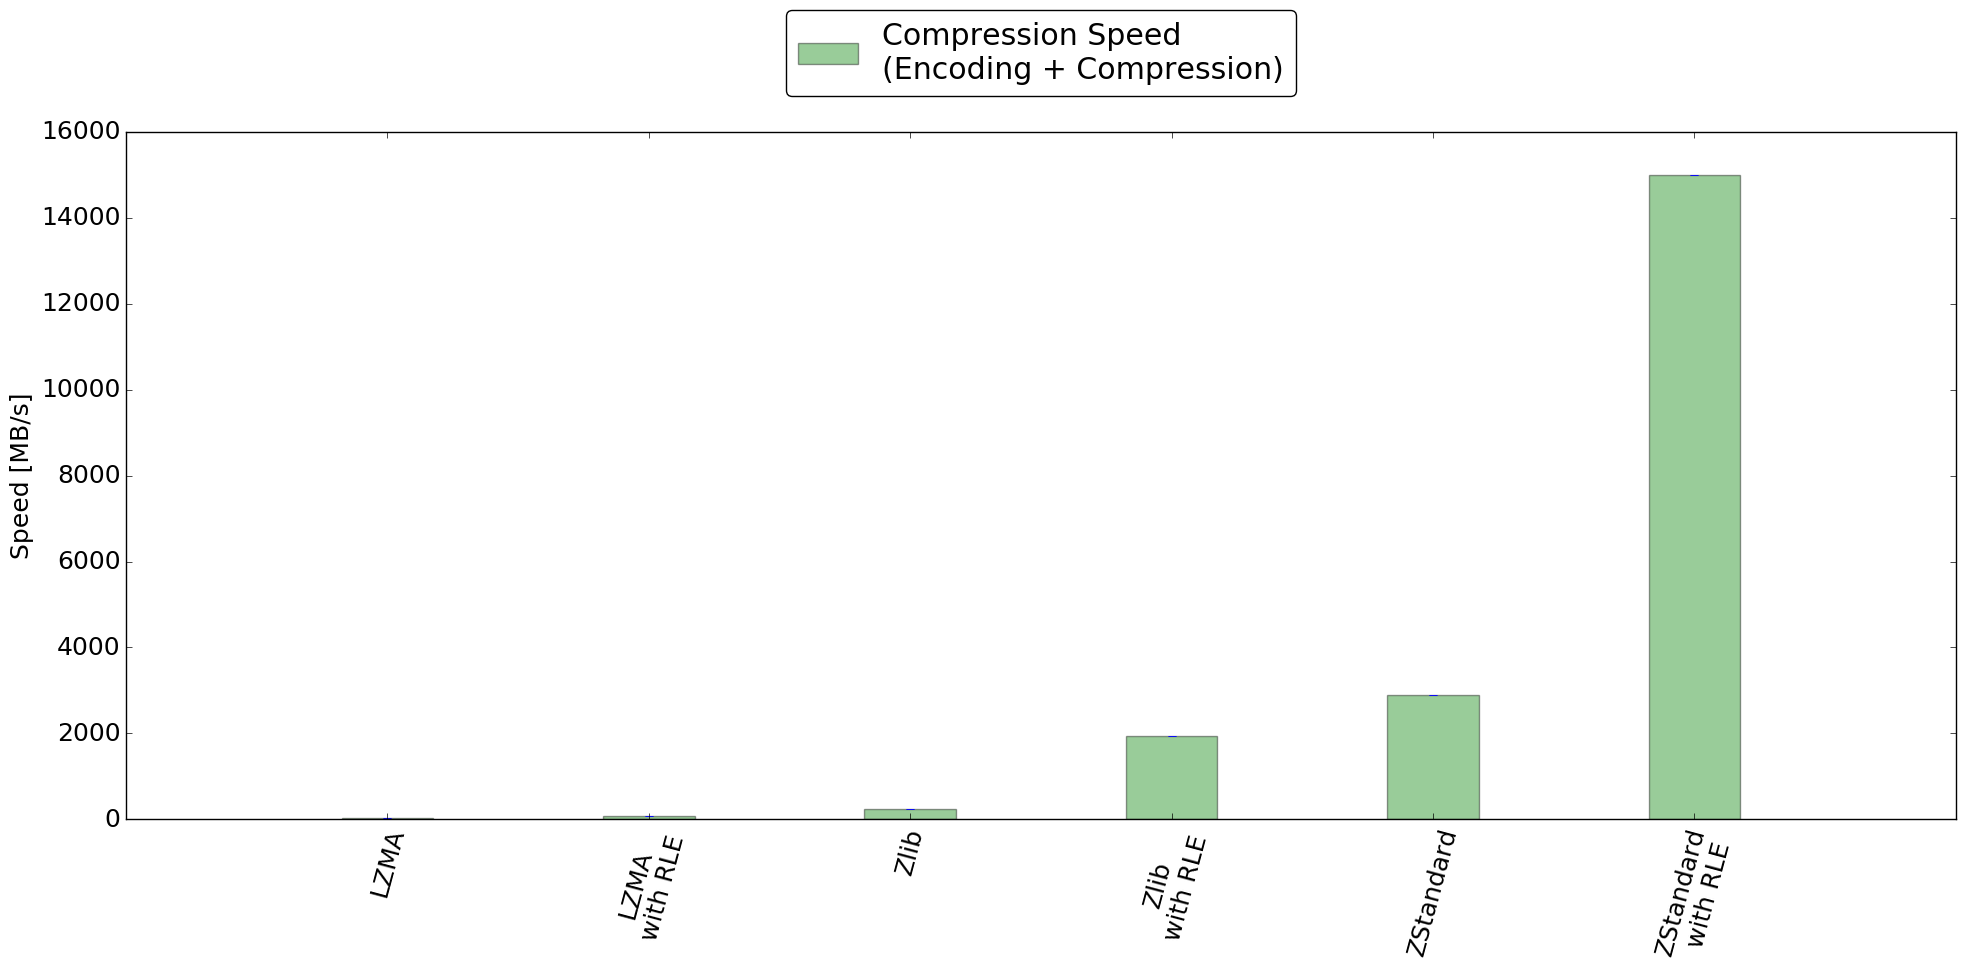

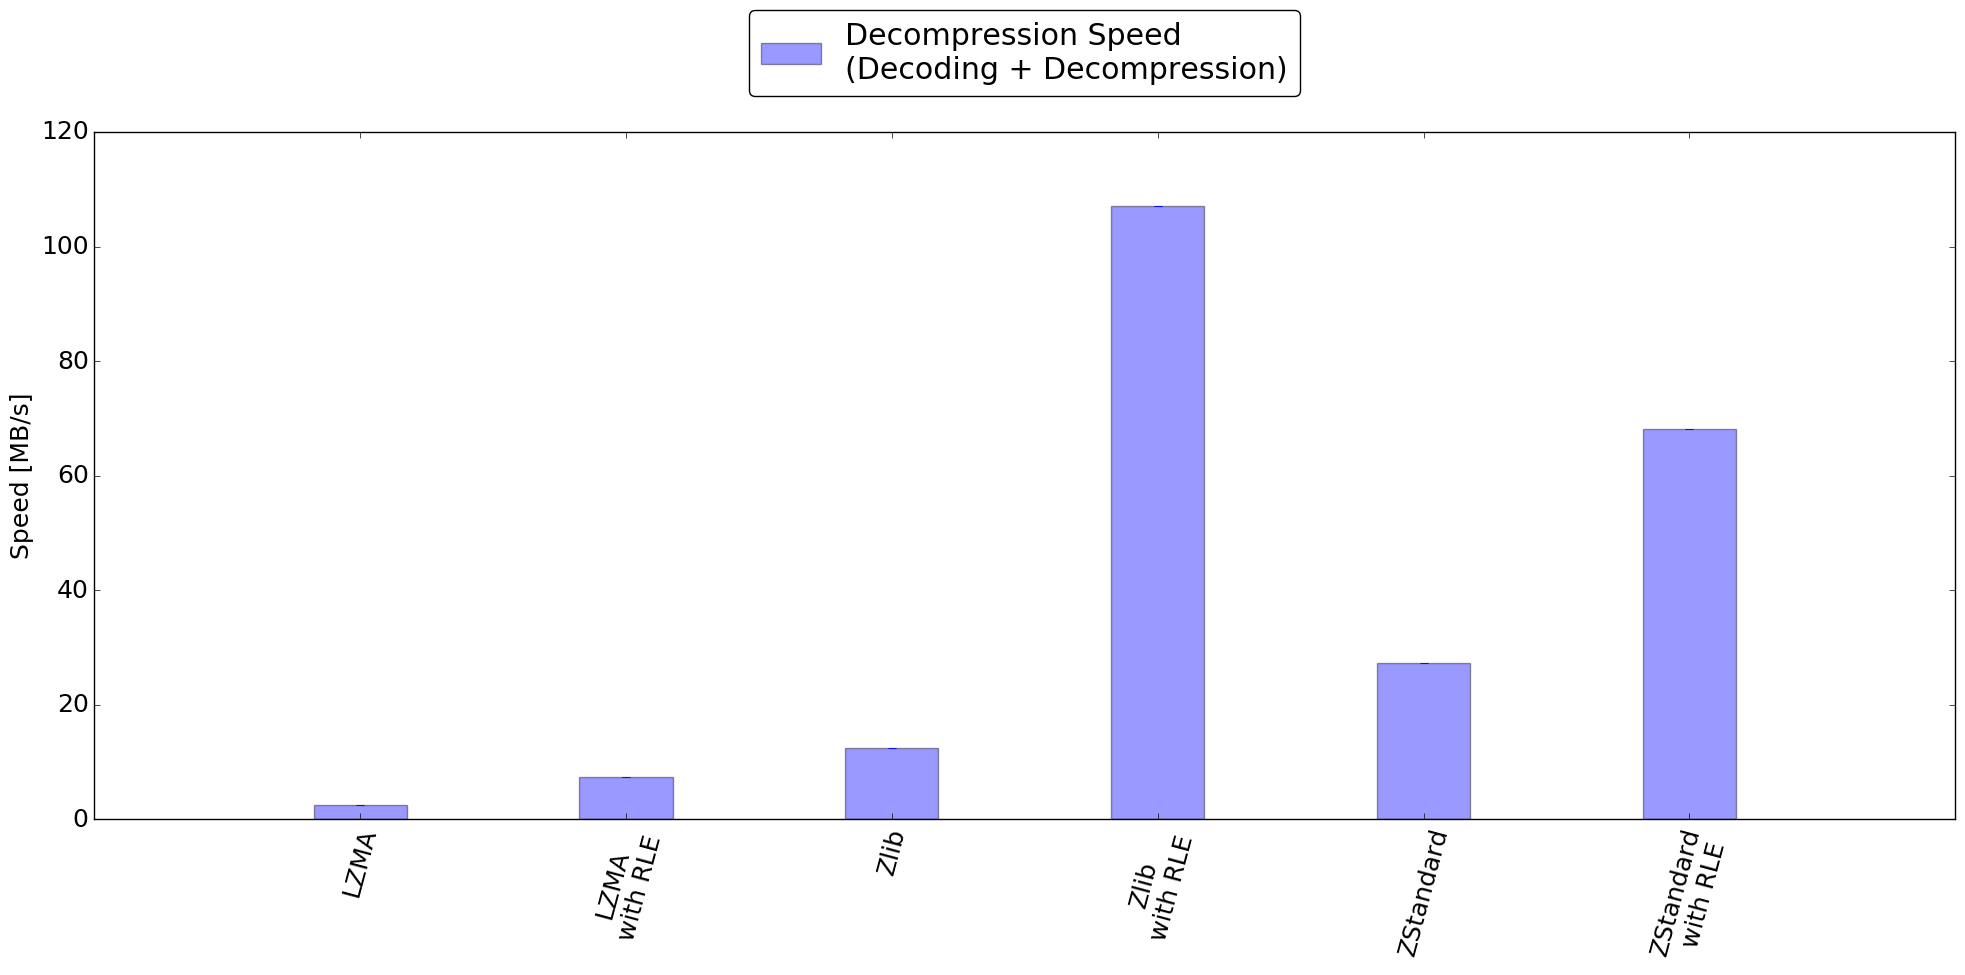

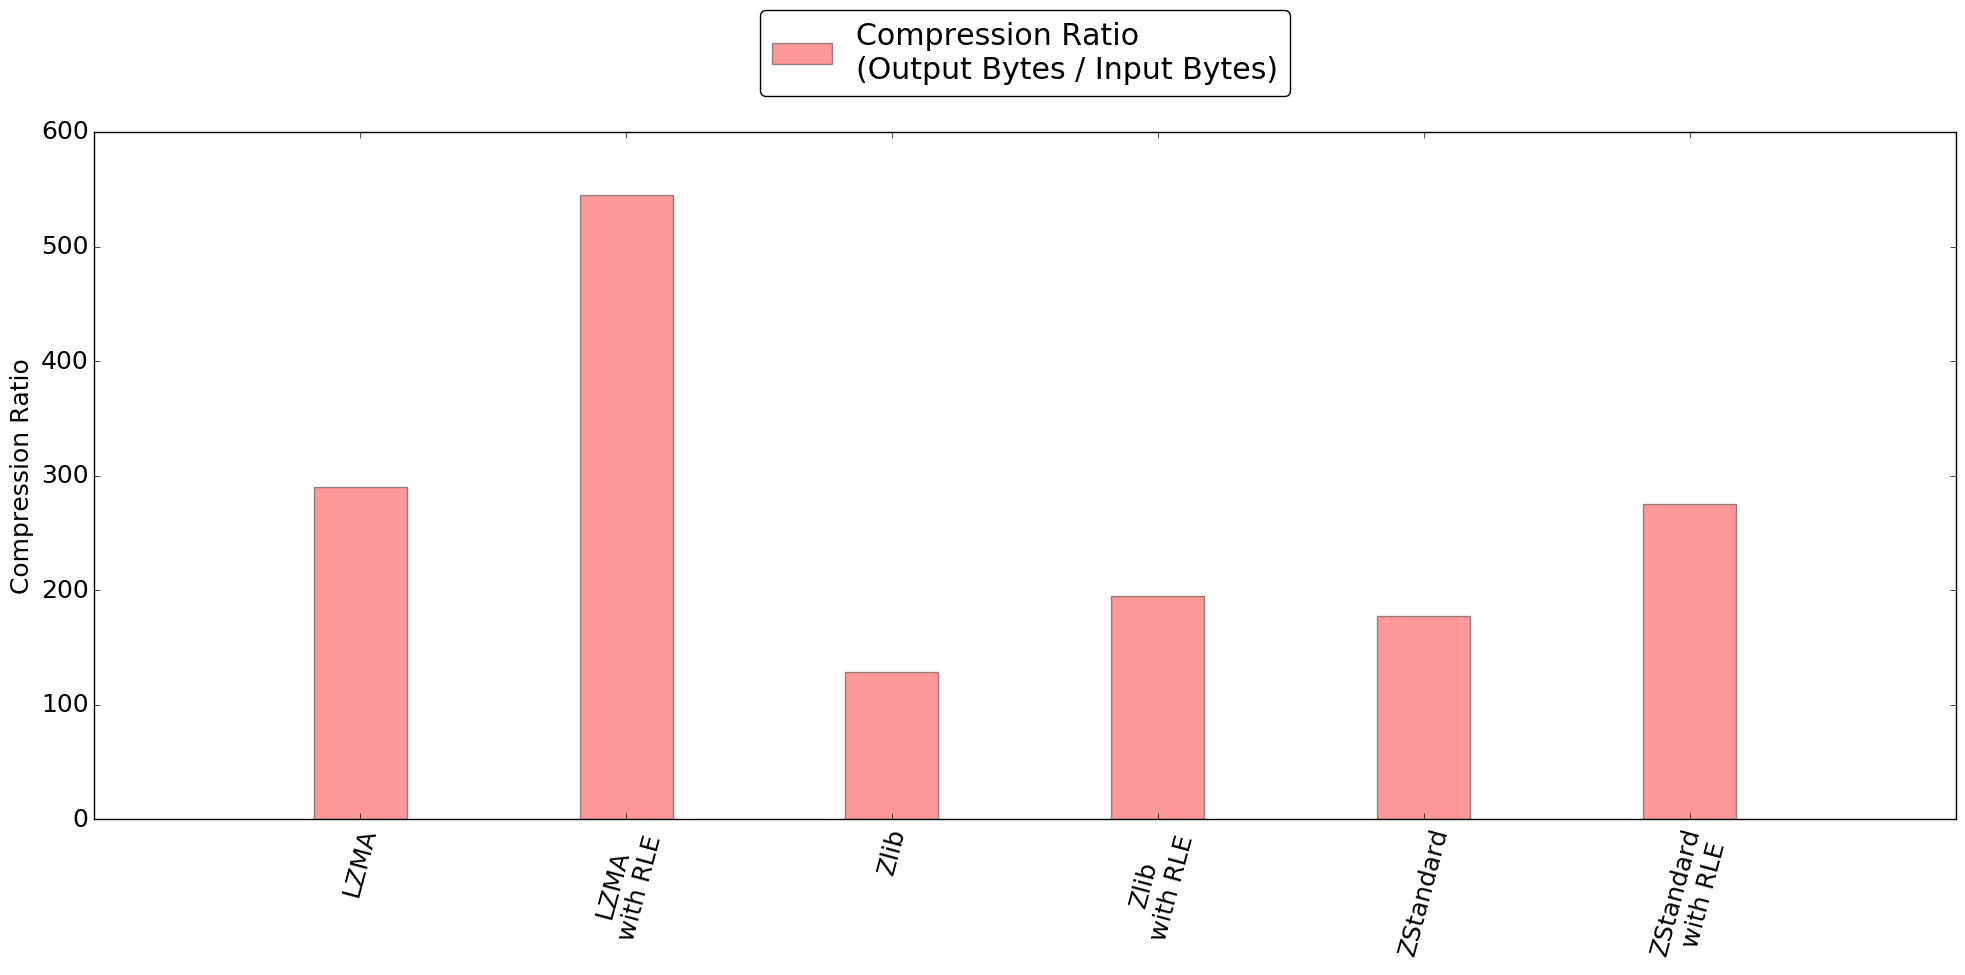

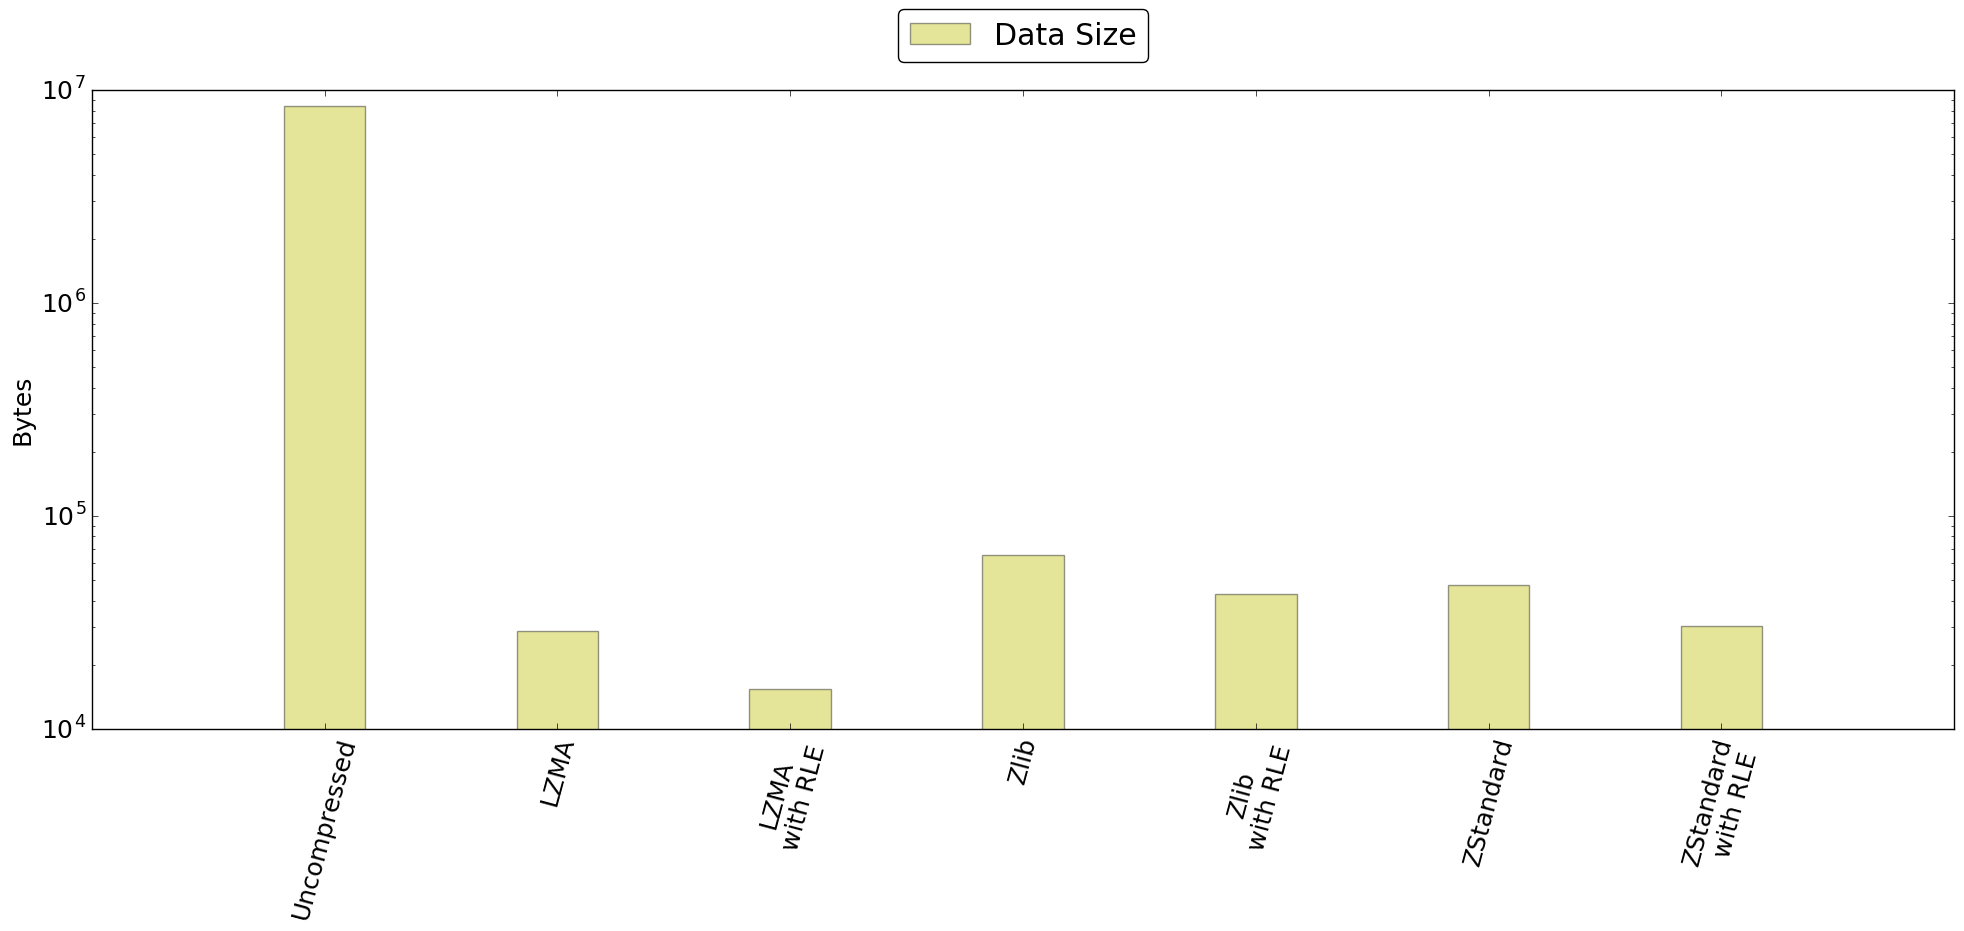

In [16]:
com_alg = [C.LZMA, C.ZLIB, C.ZSTD]
C.Util.run_experiments(data=ac3[0], N=2, com_alg=com_alg)

In [146]:
print 'RLE', len(C.RLE.encode(ac3[0:1]).tobytes()), 'RLEA', len(C.RLEA.encode(ac3[0:1]))

RLE 328904 RLEA 205558


In [75]:
np.array_equal(C.RLEA.decode(C.RLEA.encode(ac3)), ac3)

True

In [223]:
com_rle, t = C.Util.compress(C.LZMA, C.RLE.encode(ac3).tobytes())
com_rlea, t = C.Util.compress(C.LZMA, C.RLEA.encode(ac3))
print 'Compressed RLE', C.Util.get_size(com_rle), 'Compressed RLE-A', C.Util.get_size(com_rlea)
print type(C.RLE.encode(ac3).tobytes()), type(C.RLEA.encode(ac3))

Compressed RLE 29517 Compressed RLE-A 33669
<type 'str'> <type 'str'>


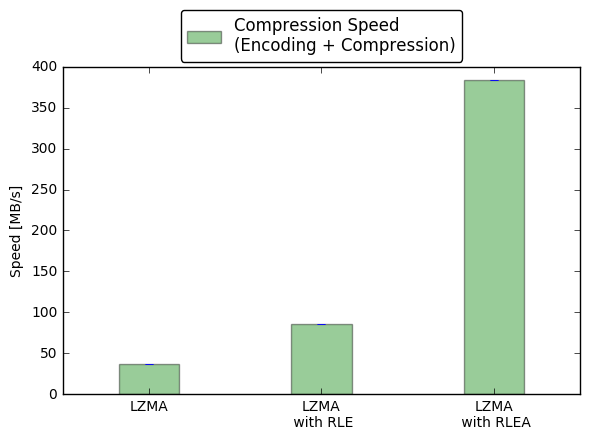

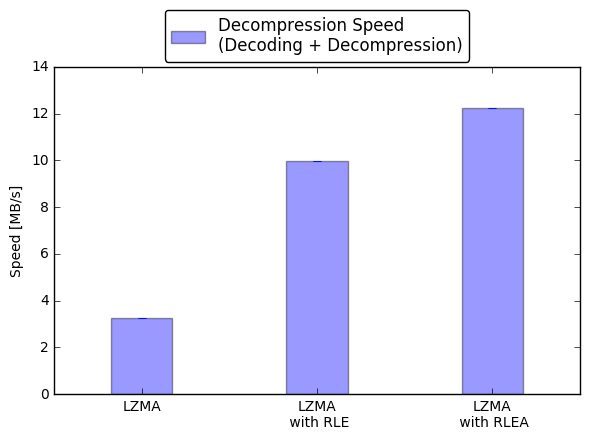

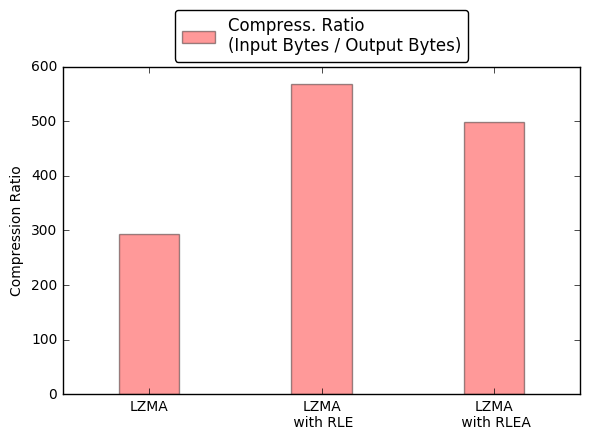

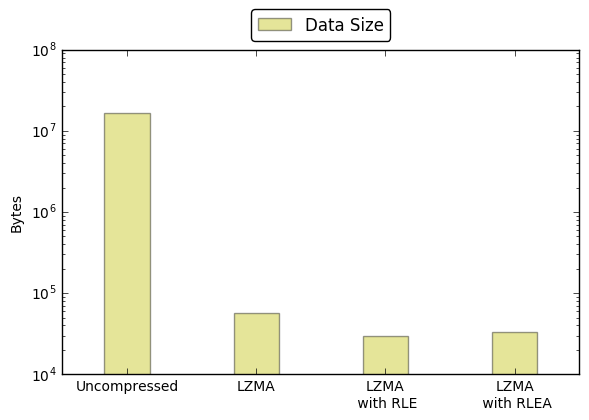

In [74]:
com_alg = [C.LZMA]
enc_alg = [C.NE, C.RLE, C.RLEA]
C.Util.run_experiments(data=ac3, N=1, com_alg=com_alg, enc_alg=enc_alg)

Zlib: 129.749166699
Zlib: 197.130858801
Neuroglancer: 25.4944990822


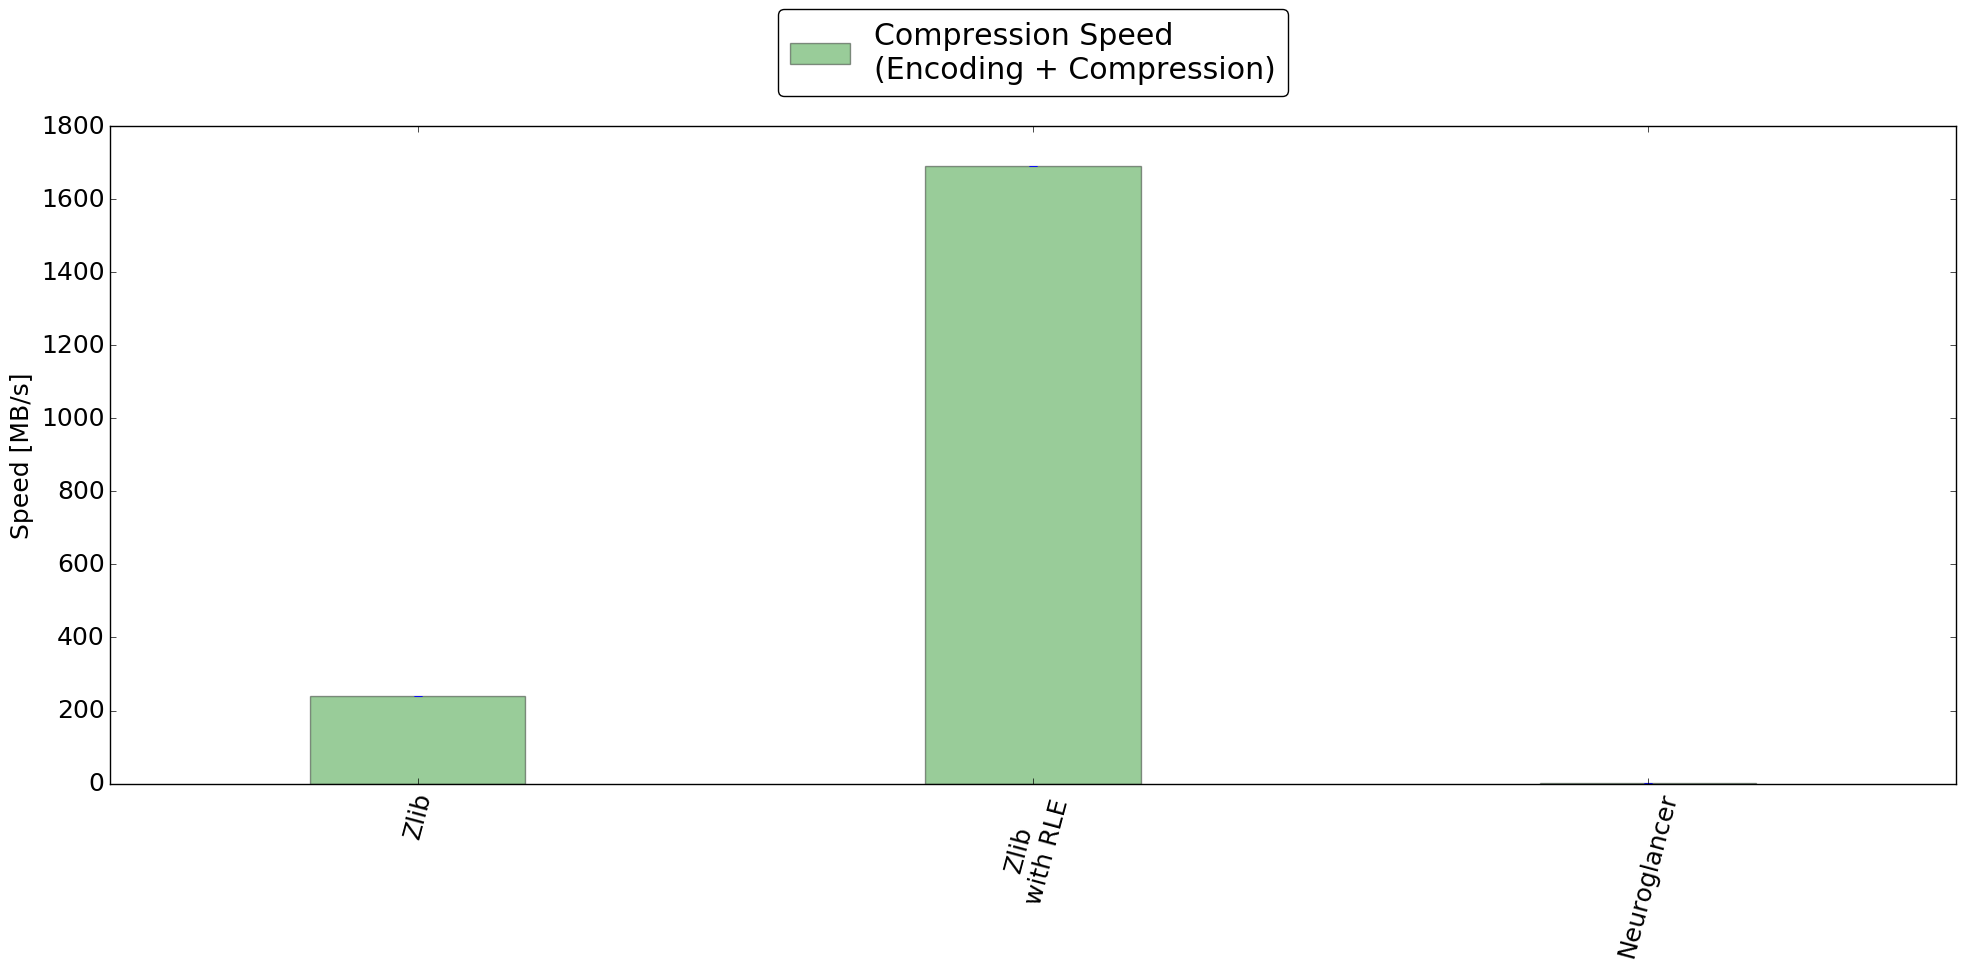

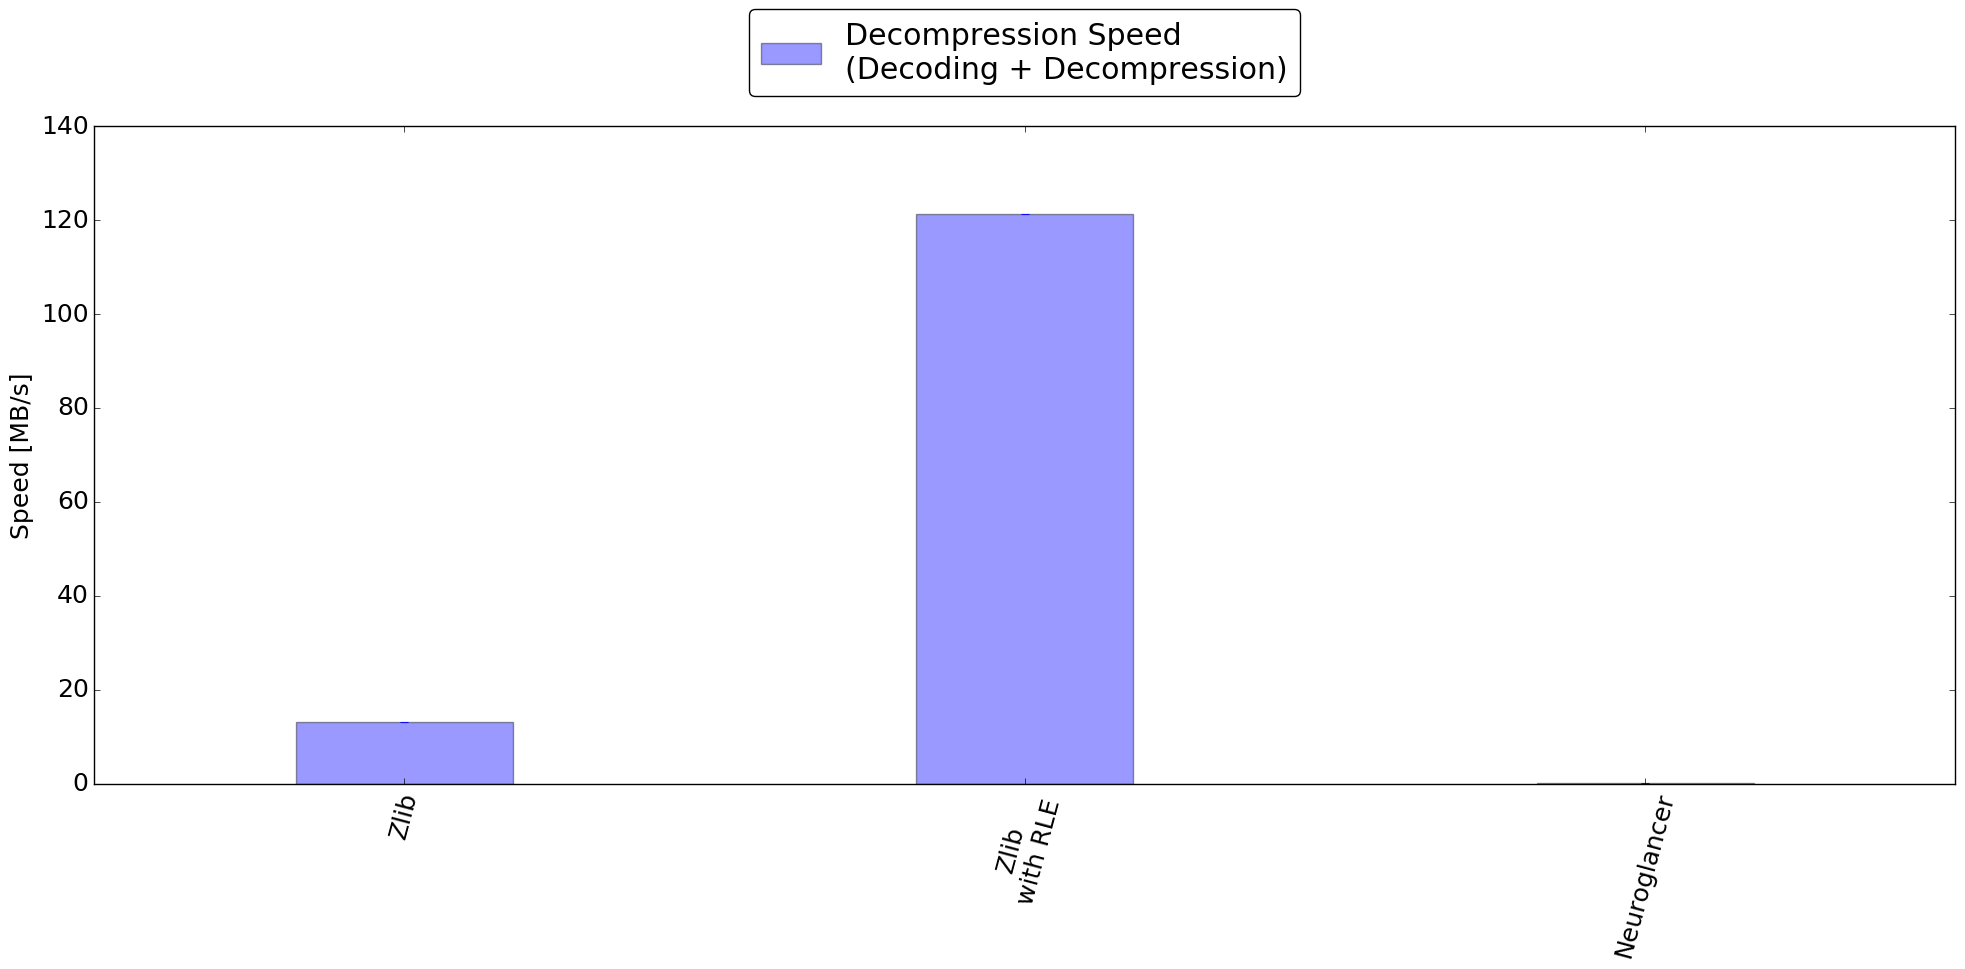

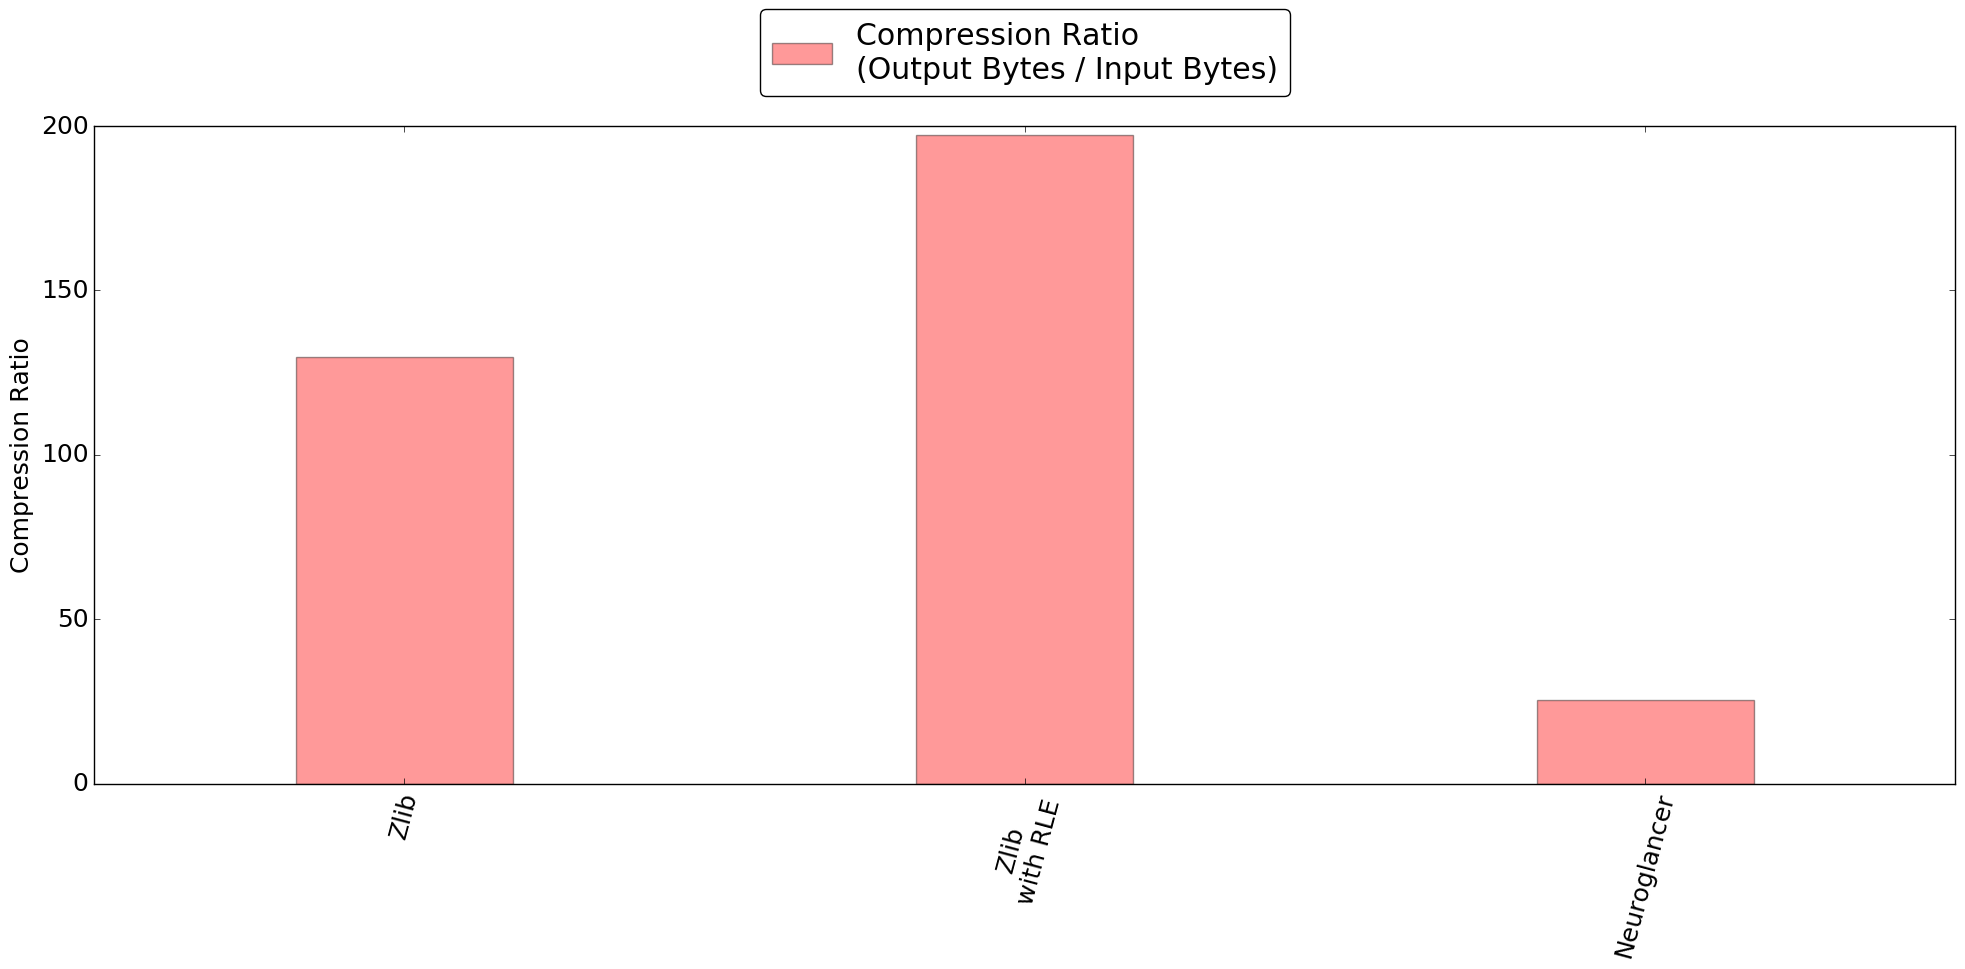

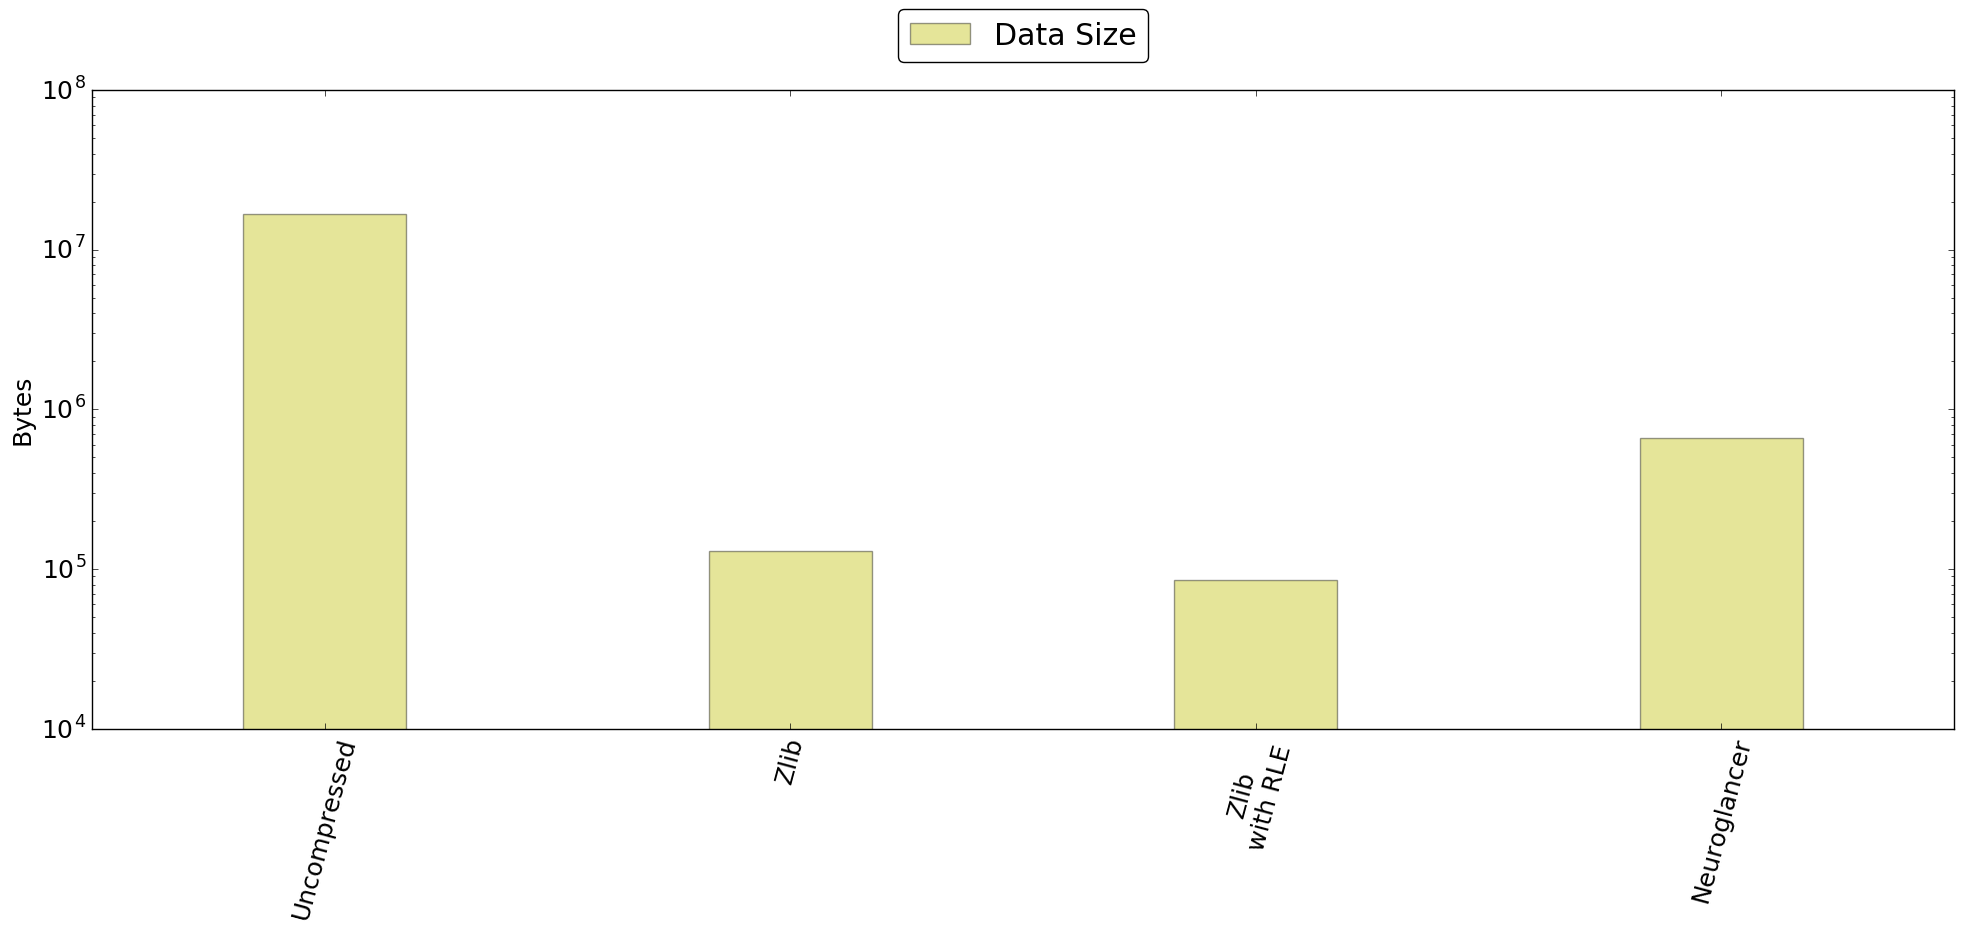

In [13]:
com_alg = [C.ZLIB, C.NG]
enc_alg = [C.NE, C.RLE]
C.Util.run_experiments(data=ac3, N=1, com_alg=com_alg, enc_alg=enc_alg)

In [21]:
# Test Neuroglancer
s_ac3 = np.float(C.Util.get_size(ac3[0:1]))
ng = C.NG.compress(ac3)
s_ng = C.Util.get_size(ng)
s_zlib_ng = C.Util.get_size(C.ZLIB.compress(ng))
s_lzma_ng = C.Util.get_size(C.LZMA.compress(ng))

print 1, s_ac3 / s_ng, s_ac3 / s_zlib_ng, s_ac3 / s_lzma_ng

1 4.12652987336 48.0306897756 77.8655181376


In [228]:
enc_rle = C.RLE.encode(ac3)
enc_rled = C.RLED.encode(ac3)
print 'RLE', C.Util.get_size(enc_rle), 'RLE-D', C.Util.get_size(enc_rled)
com_rle, t = C.Util.compress(C.LZMA, enc_rle)
com_rled, t = C.Util.compress(C.LZMA, enc_rled)
print 'Compressed RLE', C.Util.get_size(com_rle), 'Compressed RLE-D', C.Util.get_size(com_rled)

RLE 651464 RLE-D 163846
Compressed RLE 29517 Compressed RLE-D 35349


In [230]:
com_rled_lzma, t = C.Util.compress(C.LZMA, enc_rled)
com_rled_zstd, t = C.Util.compress(C.ZSTD, enc_rled)
com_rled_zlib, t = C.Util.compress(C.ZLIB, enc_rled)
print(
    'Compressed RLE-D LZMA', C.Util.get_size(com_rled_lzma),
    'Compressed RLE-D ZSTD', C.Util.get_size(com_rled_zstd),
    'Compressed RLE-D ZLIB', C.Util.get_size(com_rled_zlib)
)

('Compressed RLE-D LZMA', 35349, 'Compressed RLE-D ZSTD', 67151, 'Compressed RLE-D ZLIB', 59574)


In [294]:
start = 4 + enc_rled[3]
block_size = len(rled[start:]) / 2

enc_rled_h = enc_rled[:4 + start]
enc_rled_rlen = enc_rled[start : start + block_size]
enc_rled_ids = enc_rled[start + block_size :]

# No delta = nd
enc_rled_nd = C.RLED.encode(ac3, diff=False)
enc_rled_ids_nd = enc_rled_nd[start + block_size :]

print len(enc_rled_header), enc_rled_header[-10:]
print len(enc_rled_rlen), enc_rled_rlen[-10:]
print len(enc_rled_ids), enc_rled_ids[-10:]

com_rled_h, t = C.Util.compress(C.LZMA, enc_rled_h)
com_rled_h_64, t = C.Util.compress(C.LZMA, enc_rled_h.astype(np.uint64))
com_rled_rlen, t = C.Util.compress(C.LZMA, enc_rled_rlen)
com_rled_rlen_64, t = C.Util.compress(C.LZMA, enc_rled_rlen.astype(np.uint64))
com_rled_ids, t = C.Util.compress(C.LZMA, enc_rled_ids)
com_rled_ids_64, t = C.Util.compress(C.LZMA, enc_rled_ids)
com_rled_ids_nd, t = C.Util.compress(C.LZMA, enc_rled_ids_nd)

print 'Compressed RLE-D Header', C.Util.get_size(com_rled_h)
print 'Compressed RLE-D Header uint64', C.Util.get_size(com_rled_h_64)
print 'Compressed RLE-D Run Lengths', C.Util.get_size(com_rled_rlen)
print 'Compressed RLE-D Run Lengths uint64', C.Util.get_size(com_rled_rlen_64)
print 'Compressed RLE-D IDs', C.Util.get_size(com_rled_ids)
print 'Compressed RLE-D IDs int64', C.Util.get_size(com_rled_ids_64)
print 'Compressed RLE-D IDs no delta', C.Util.get_size(com_rled_ids_nd)
print 'Total', C.Util.get_size(com_rled_header) + C.Util.get_size(com_rled_rlen) + C.Util.get_size(com_rled_ids)
print 'Total 64', C.Util.get_size(com_rled_header_64) + C.Util.get_size(com_rled_rlen_64) + C.Util.get_size(com_rled_ids_64)

wrustz 40709
461 [3615 5343  237 5579 5233 3697  670  722  749  759]
40709 [ 313  331  541  583  607  656  671  694  746 1024]
40709 [  -6    7 -264  266    3  -10   11   -3   -6  -63]
Compressed RLE-D Header 949
Compressed RLE-D Header uint64 985
Compressed RLE-D Run Lengths 27037
Compressed RLE-D Run Lengths uint64 25749
Compressed RLE-D IDs 7561
Compressed RLE-D IDs int64 7561
Compressed RLE-D IDs no delta 5093
Total 35547
Total 64 34295


In [274]:
enc_rle_h = enc_rle[3]
enc_rle_rlen = enc_rle[3::2]
enc_rle_ids = enc_rle[4::2]

enc_rle_sep = np.append(enc_rle[3], np.append(enc_rle_rlen, enc_rle_ids))

com_rle_h, t = C.Util.compress(C.LZMA, enc_rle_h.tobytes())
com_rle_rlen, t = C.Util.compress(C.LZMA, enc_rle_rlen.tobytes())
com_rle_ids, t = C.Util.compress(C.LZMA, enc_rle_ids.tobytes())
com_rle_sep, t = C.Util.compress(C.LZMA, enc_rle_sep.tobytes())

print 'Compressed RLE Header', C.Util.get_size(com_rle_h)
print 'Compressed RLE Run lengths', C.Util.get_size(com_rle_rlen)
print 'Compressed RLE IDs', C.Util.get_size(com_rle_ids)

print 'Compressed RLE Combined Interwined', C.Util.get_size(com_rle)
print 'Compressed RLE Combined Separated ID and run length lists', C.Util.get_size(com_rle_sep)

Compressed RLE Header 101
Compressed RLE Run lengths 25749
Compressed RLE IDs 6645
Compressed RLE Combined Interwined 29517
Compressed RLE Combined Separated ID and run length lists 32285


In [268]:
print 'Compressed RLE Header + IDs', C.Util.get_size(com_rle_h) + C.Util.get_size(com_rle_ids)
print 'Compressed RLED Header + IDs', C.Util.get_size(com_rled_h) + C.Util.get_size(com_rled_ids_nd)

Compressed RLE Header + IDs 6746
Compressed RLED Header + IDs 6042


block_size 40709
-443 443


<function matplotlib.pyplot.show>

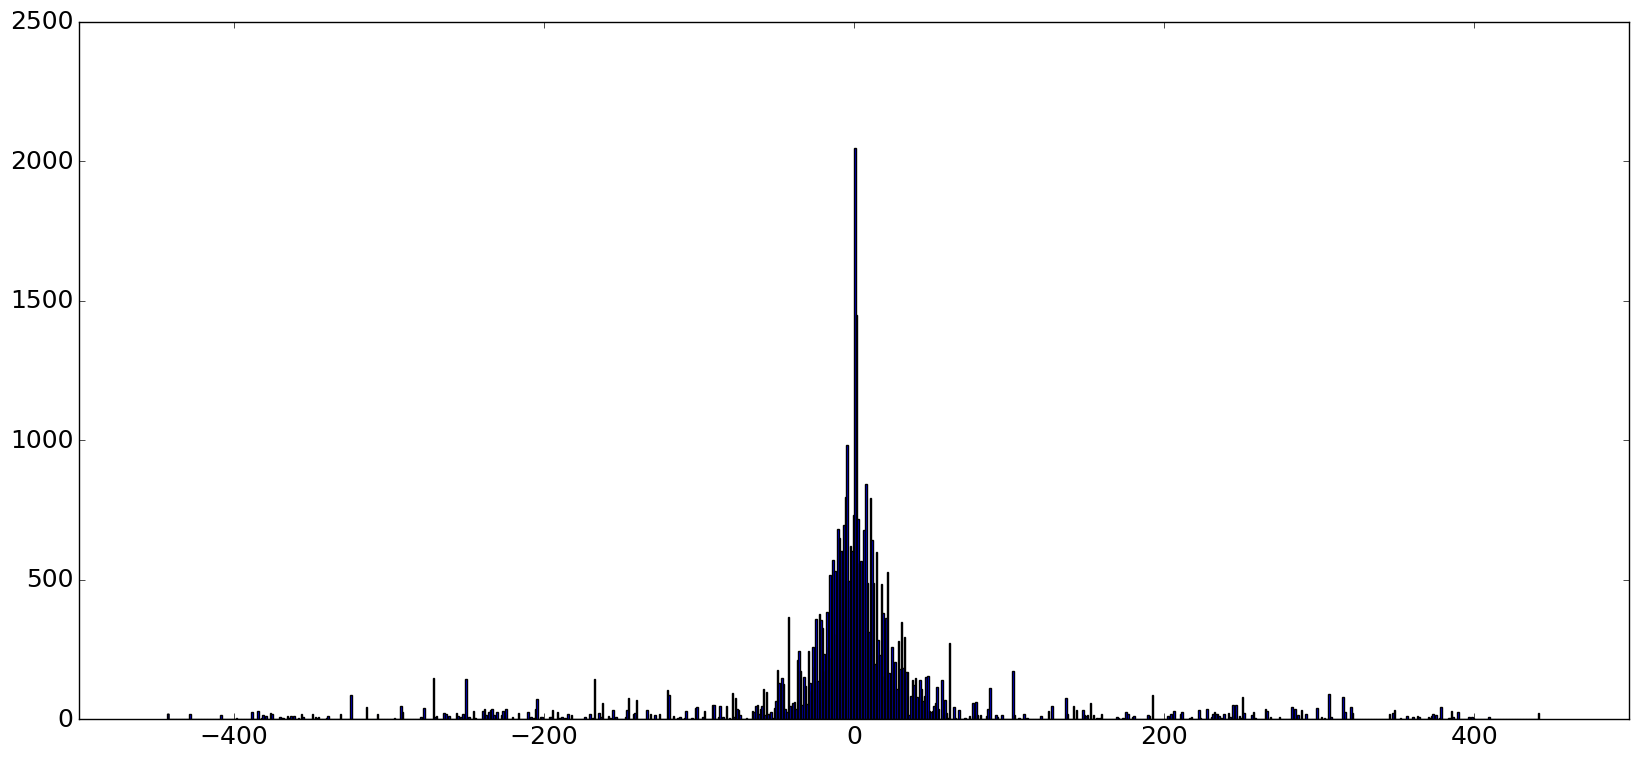

In [220]:
rled = C.RLED.encode(ac3)
start = 4 + np.uint32(rled[3])
block_size = len(rled[start:]) / 2
print 'block_size', block_size
ids = rled[start + block_size:]
print min(ids), max(ids)
plt.hist(ids, bins=range(min(ids), max(ids)))
plt.show

In [10]:
com_alg = [C.LZMA]
enc_alg = [C.NE, C.RLE]
m, b, r, cs, cse, dcs, dcse, es, ese, des, dese = C.Util.run_experiments(data=ac3, N=2, com_alg=com_alg, enc_alg=enc_alg, verbose=True)

> NE + LZMA
Compression Method: LZMA
Encoding Method: NE
Input Size: 41.94304 MB
Output Size: 0.142172 MB
Ratio: 295.016177588
Compression Speed [MB/s]: 19.0878363685
Decompression Speed [MB/s]: 387.771101184
Encoding Speed [MB/s]: 12132542.0996
Decoding Speed [MB/s]: 20696689.464

> RLE + LZMA
Compression Method: LZMA
Encoding Method: RLE
Input Size: 41.94304 MB
Output Size: 0.07062 MB
Ratio: 593.925800057
Compression Speed [MB/s]: 42.1518342381
Decompression Speed [MB/s]: 3234.48203135
Encoding Speed [MB/s]: 123.844154877
Decoding Speed [MB/s]: 208.494546446



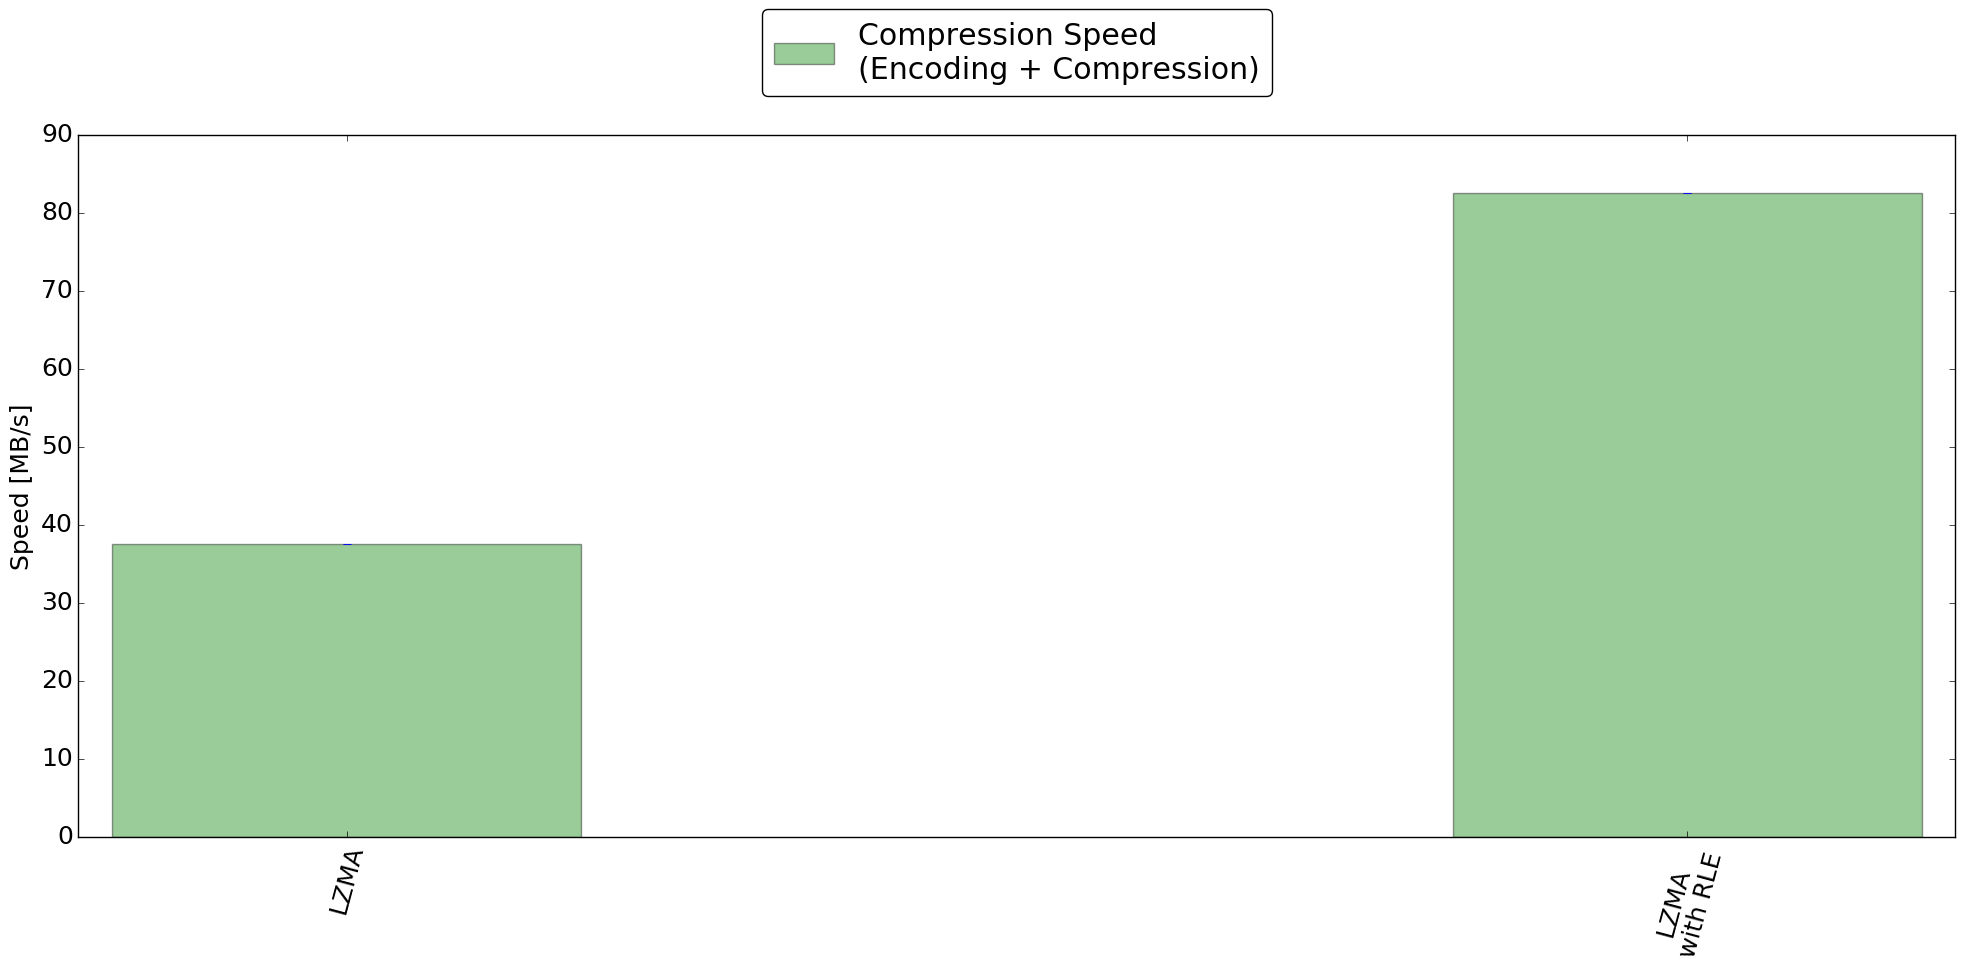

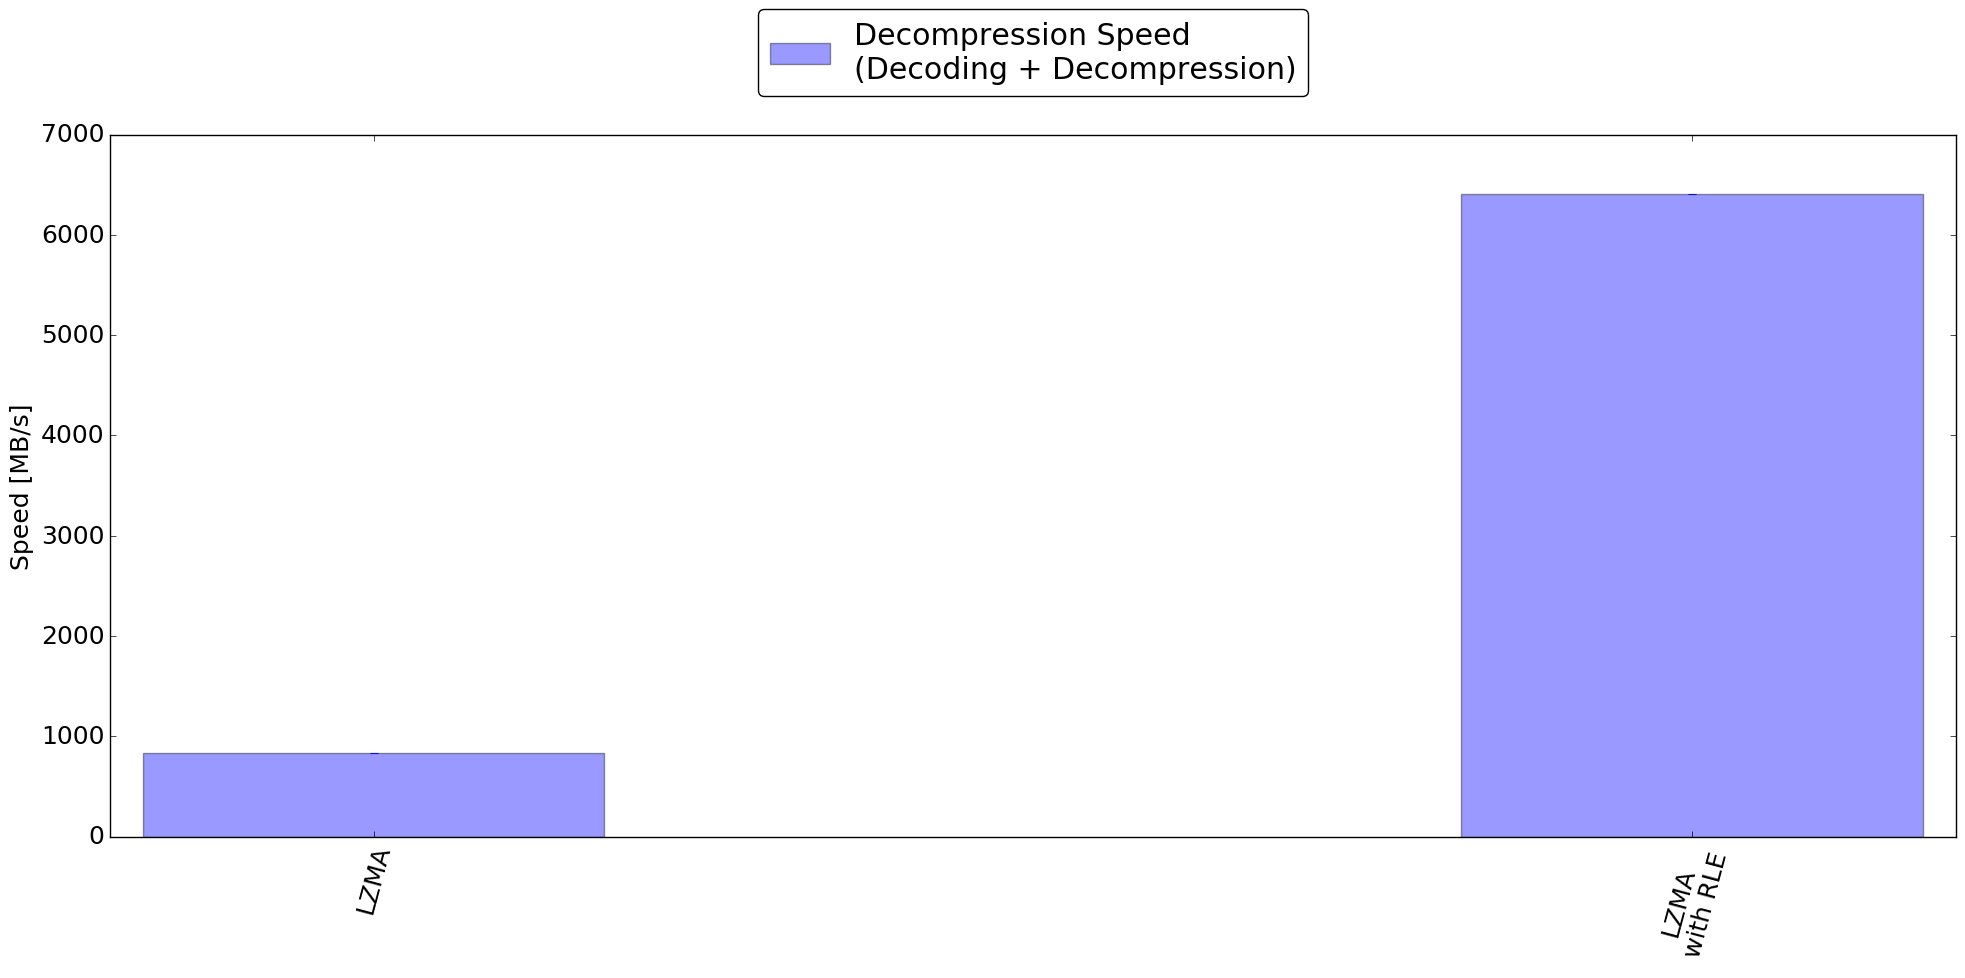

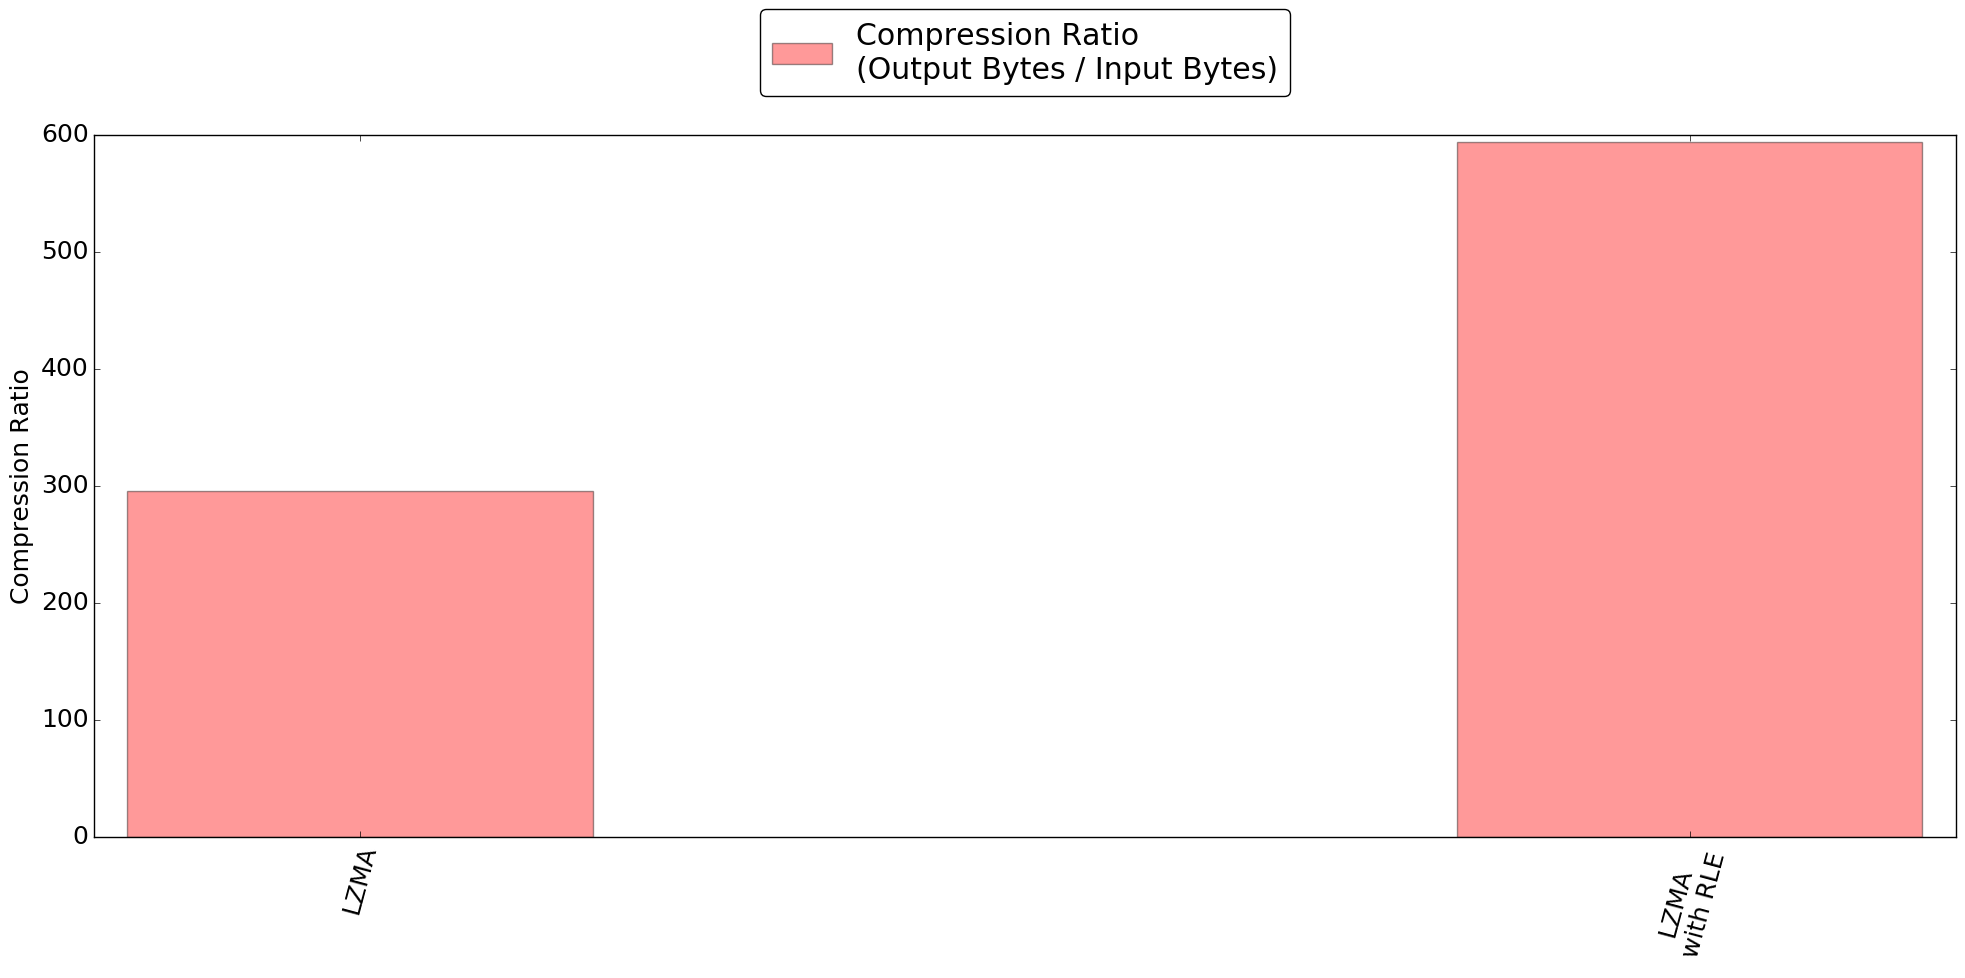

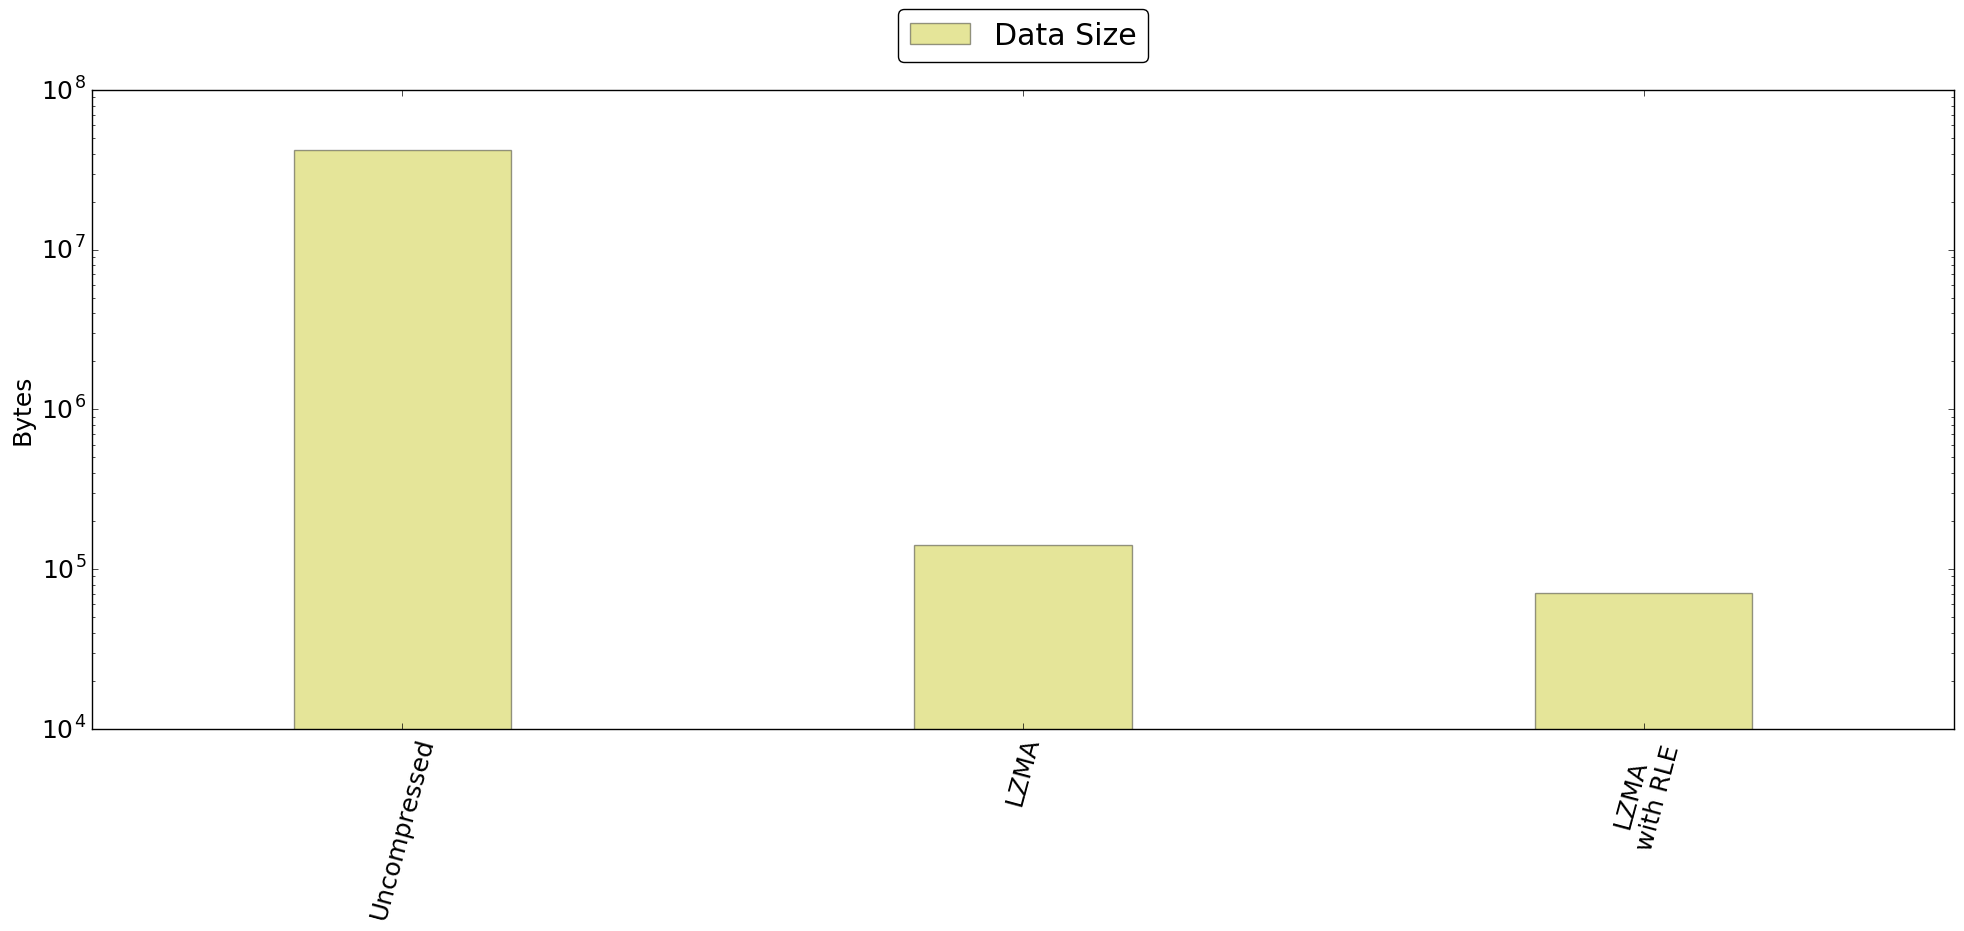

In [7]:
C.Util.plot(m, b, r, cs, cse, dcs, dcse, es, ese, des, dese)

40709
[  0   1   2 ..., 384 378 315] int64
[  0   1   1 ...,  -3  -6 -63] int64
-443 443
Compressed RLE IDs 5056
Compressed RLE IDs delta 7524


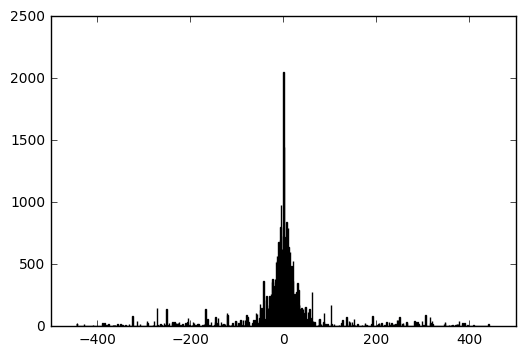

In [45]:
unique_ids = C.RLED.get_unique_ids(ac3)
d = {v: i for i, v in enumerate(unique_ids)}

rle_ids_delta = np.array([], dtype=np.int16)
rle_ids = np.array([], dtype=np.uint16)

for i in range(ac3.shape[0]):
    for j in range(ac3.shape[1]):
        x = ac3[i][j, :]
        pos, = np.where(np.diff(x) != 0)
        pos = np.concatenate(([0], pos + 1, [len(x)]))

        rle_ids_delta = np.append(
            rle_ids_delta,
            np.append(
                pos[0],
                np.diff(map(lambda k: d[x[k]], pos[:-1]))
            )
        )

        rle_ids = np.append(
            rle_ids,
            map(lambda k: d[x[k]], pos[:-1])
        )


print len(rle_ids)
print rle_ids, rle_ids.dtype
print rle_ids_delta, rle_ids_delta.dtype


neg, = np.where(rle_ids_delta < 0)
print min(rle_ids_delta), max(rle_ids_delta)
plt.hist(rle_ids_delta, bins=range(min(rle_ids_delta), max(rle_ids_delta)))
plt.show
        
# Merge pos + neg array
non_neg = np.copy(rle_ids_delta)
non_neg[neg] = rle_ids[neg]
non_neg = non_neg.astype(np.uint16)

when_no_delta = np.zeros(len(rle_ids), dtype=np.bool)
when_no_delta[neg] = 1

com_ids, t = C.Util.compress(C.LZMA, rle_ids.astype(np.uint16))
com_ids_delta, t = C.Util.compress(C.LZMA, rle_ids_delta.astype(np.int16))

print 'Compressed RLE IDs', C.Util.get_size(com_ids)
print 'Compressed RLE IDs delta', C.Util.get_size(com_ids_delta)

In [330]:
def bool_arr_to_uint(arr):
    out = 0
    for v, i in enumerate(arr):
        out = np.bitwise_or(out, np.left_shift(v, i))
    
    return out

bool_arr_to_uint(when_no_delta)

131071

In [48]:
rle_ids = C.RLE.encode(ac3[0:1])[4::2]
u_ids, h_ids = C.HashNums.hash(rle_ids)

assert (np.array_equal(rle_ids, C.HashNums.unhash(u_ids, h_ids)))

com_ids, t = C.Util.compress(C.LZMA, rle_ids.tobytes())
com_h_ids, t = C.Util.compress(C.LZMA, u_ids.tobytes() + h_ids.tobytes())

print 'Compressed RLE IDs', C.Util.get_size(com_ids)
print 'Compressed Hashed RLE IDs (inkl. hash table)', C.Util.get_size(com_h_ids)

Compressed RLE IDs 3492
Compressed Hashed RLE IDs (inkl. hash table) 3824


<function matplotlib.pyplot.show>

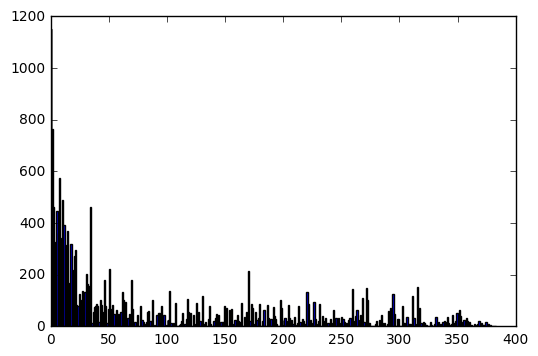

In [52]:
delta_nodelta_mixed_h_ids = np.copy(delta_h_ids)
neg_idx, = np.where(delta_h_ids < 0)
delta_nodelta_mixed_h_ids[neg_idx] = h_ids[neg_idx]

plt.hist(delta_nodelta_mixed_h_ids, bins=range(min(delta_nodelta_mixed_h_ids), max(delta_nodelta_mixed_h_ids)))
plt.show

C.Util.get_size(C.LZMA.compress(delta_nodelta_mixed_h_ids))

In [14]:
b, r, e, d, _, _ = C.Util.benchmark(C.LZW, C.NE, ac3[0], N=1)

Compression Method: LZW
Encoding Method: NE
Input Size: 8.388608 MB
Output Size: 0.593106 MB
Ratio: 14.1435224058
Compression Speed [MB/s]: 0.538398408816
Decompression Speed [MB/s]: 1.16444239105
Encoding Speed [MB/s]: 2199023.25555
Decoding Speed [MB/s]: 7036874.41777


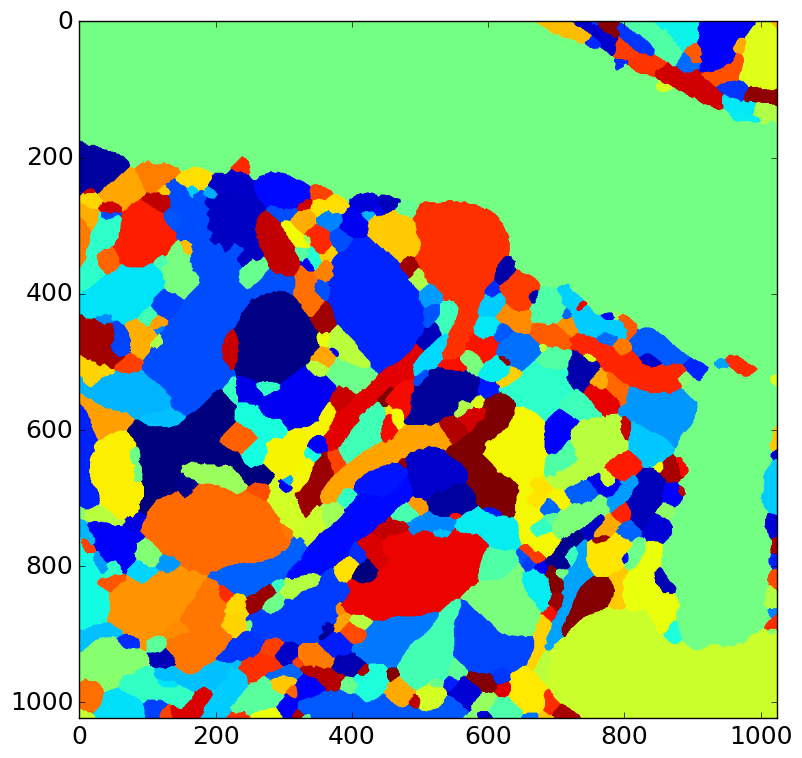

In [13]:
results = C.Util.run_experiments(data=np.copy(ac3), N=1, com_alg=[C.BOUNDARY_ENCODING], enc_alg=[C.NE])

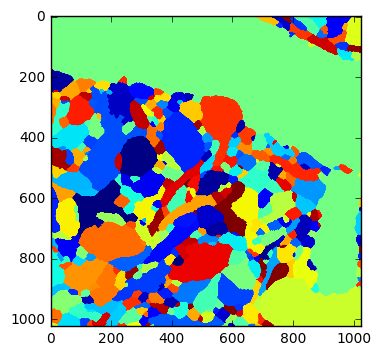

In [5]:
results = C.Util.run_experiments(data=np.copy(ac3), N=1, com_alg=[C.BOUNDARY_ENCODING], enc_alg=[C.NE], verbose=True)

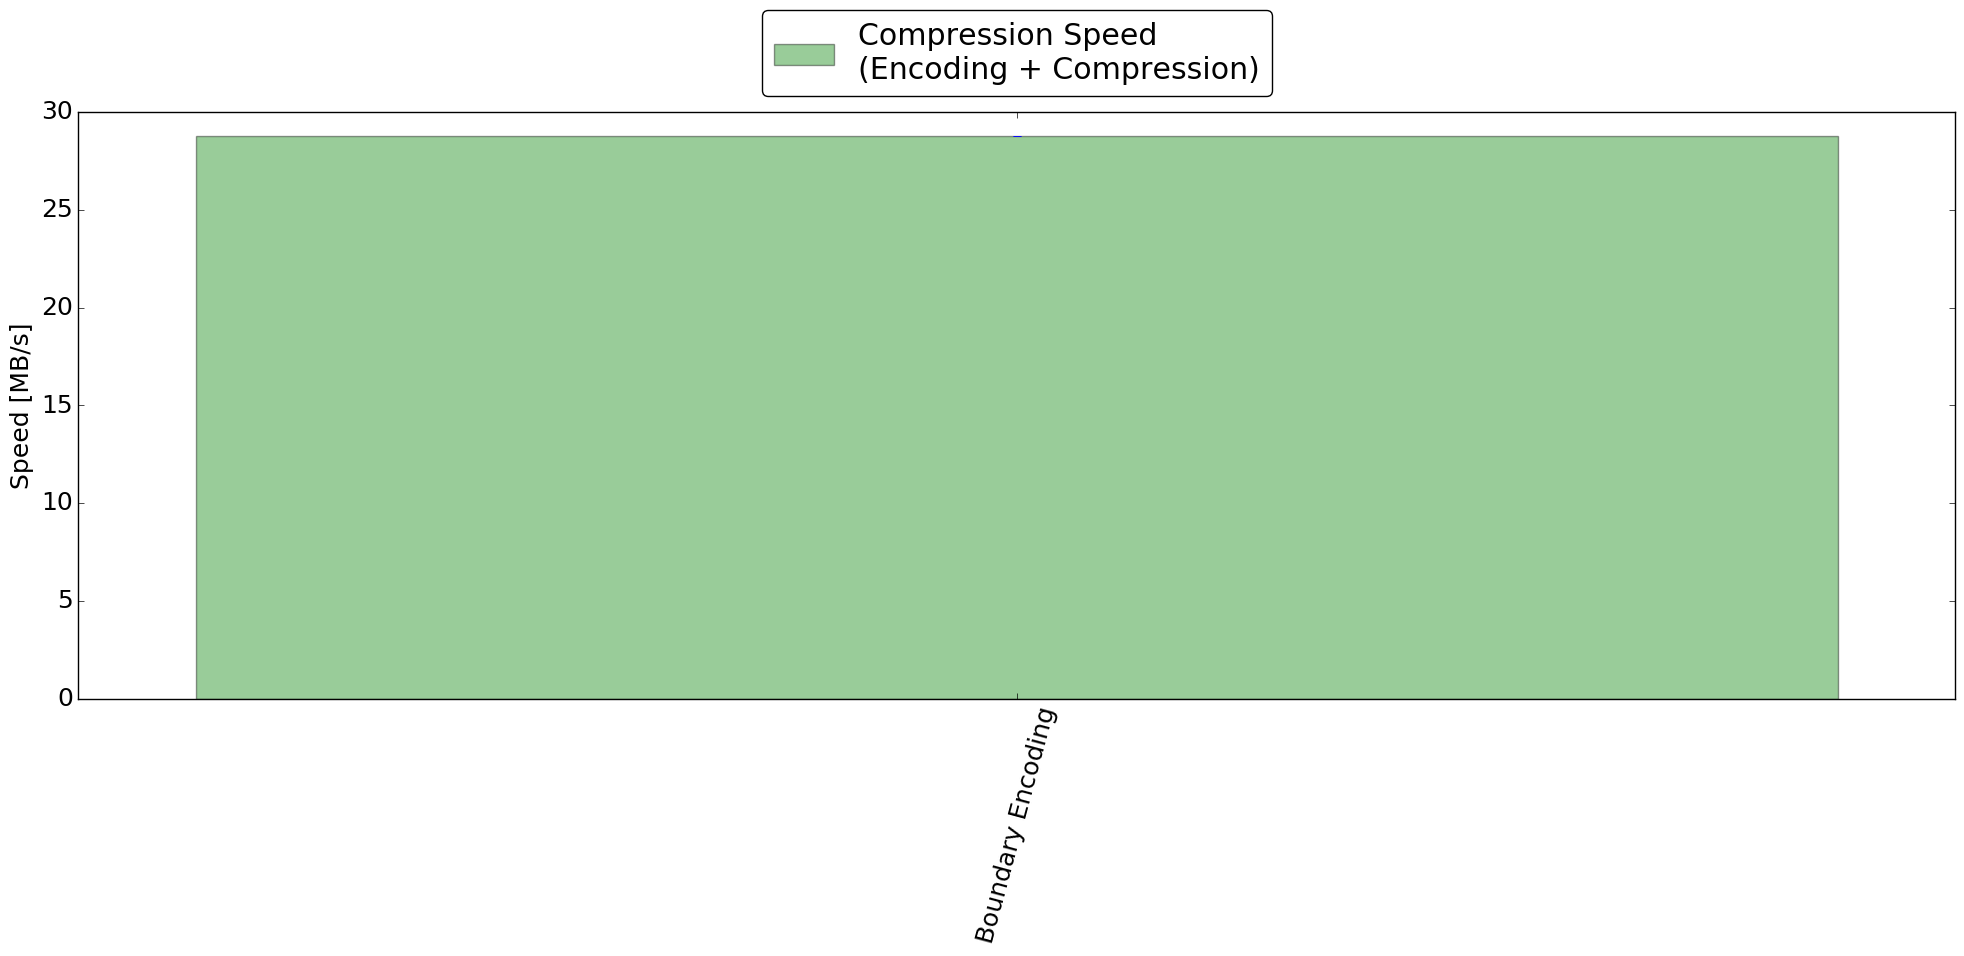

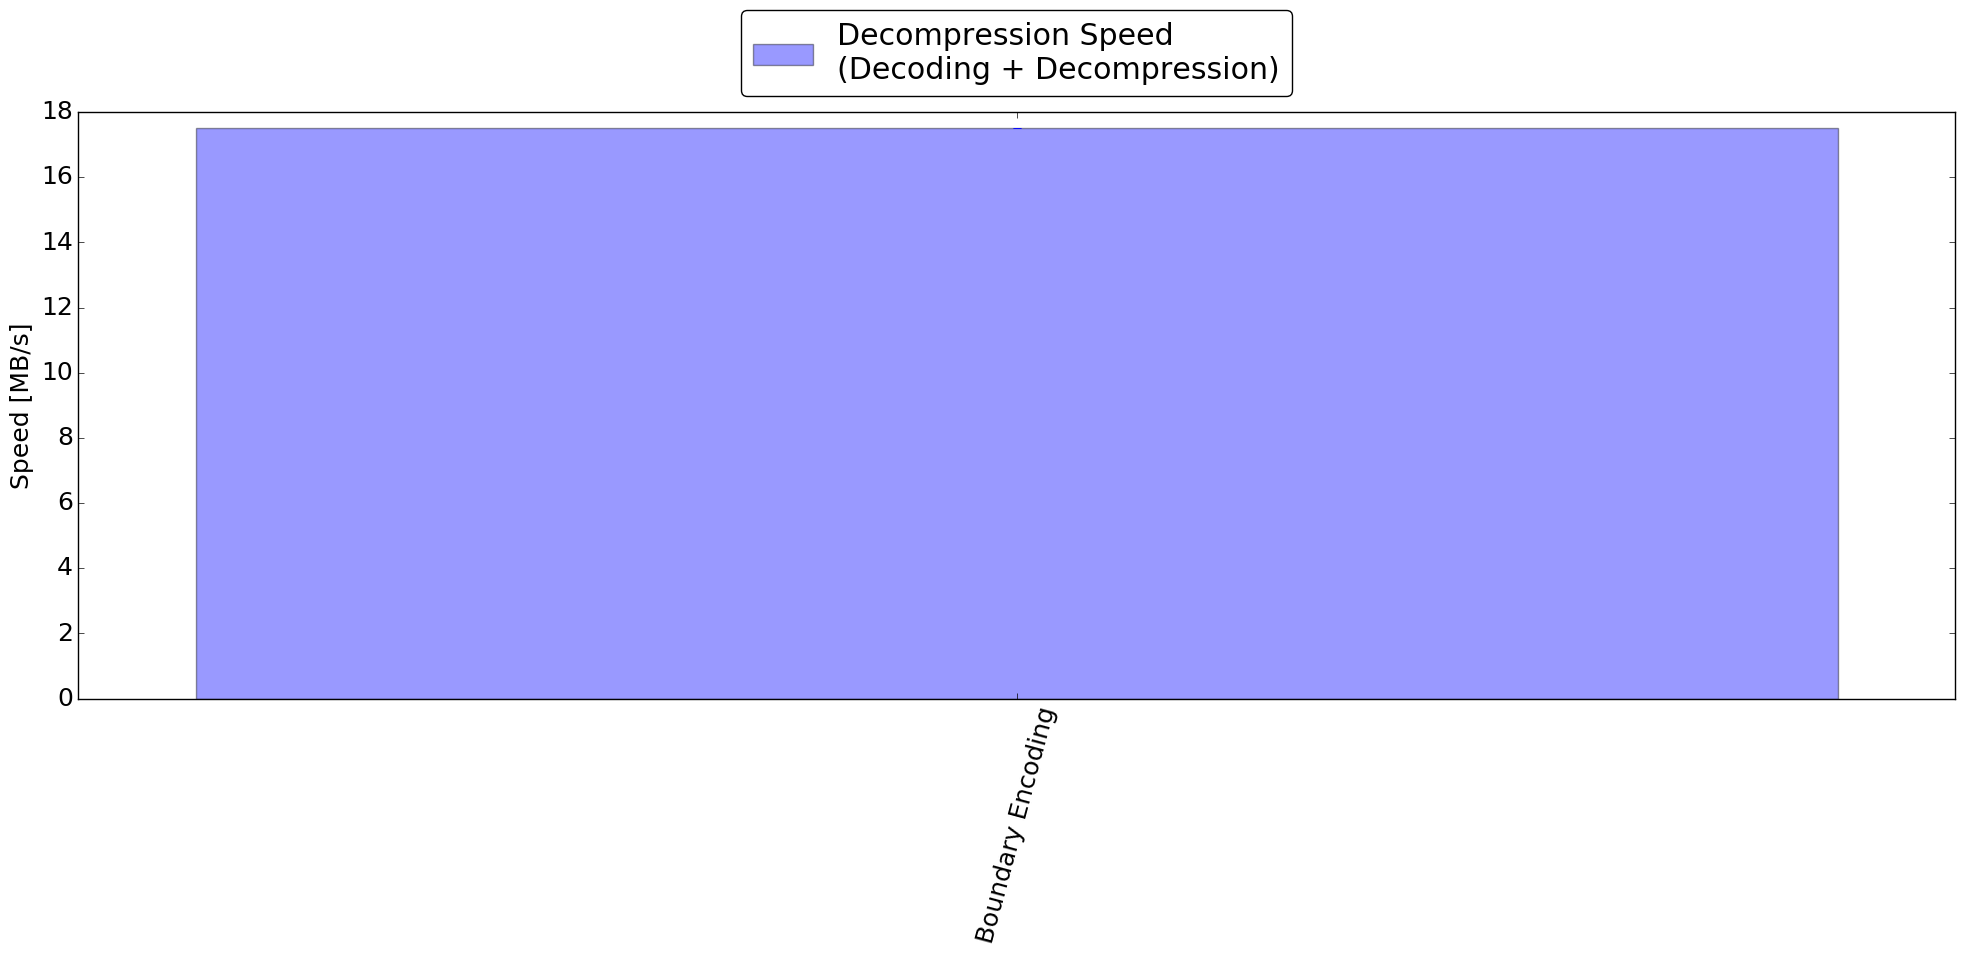

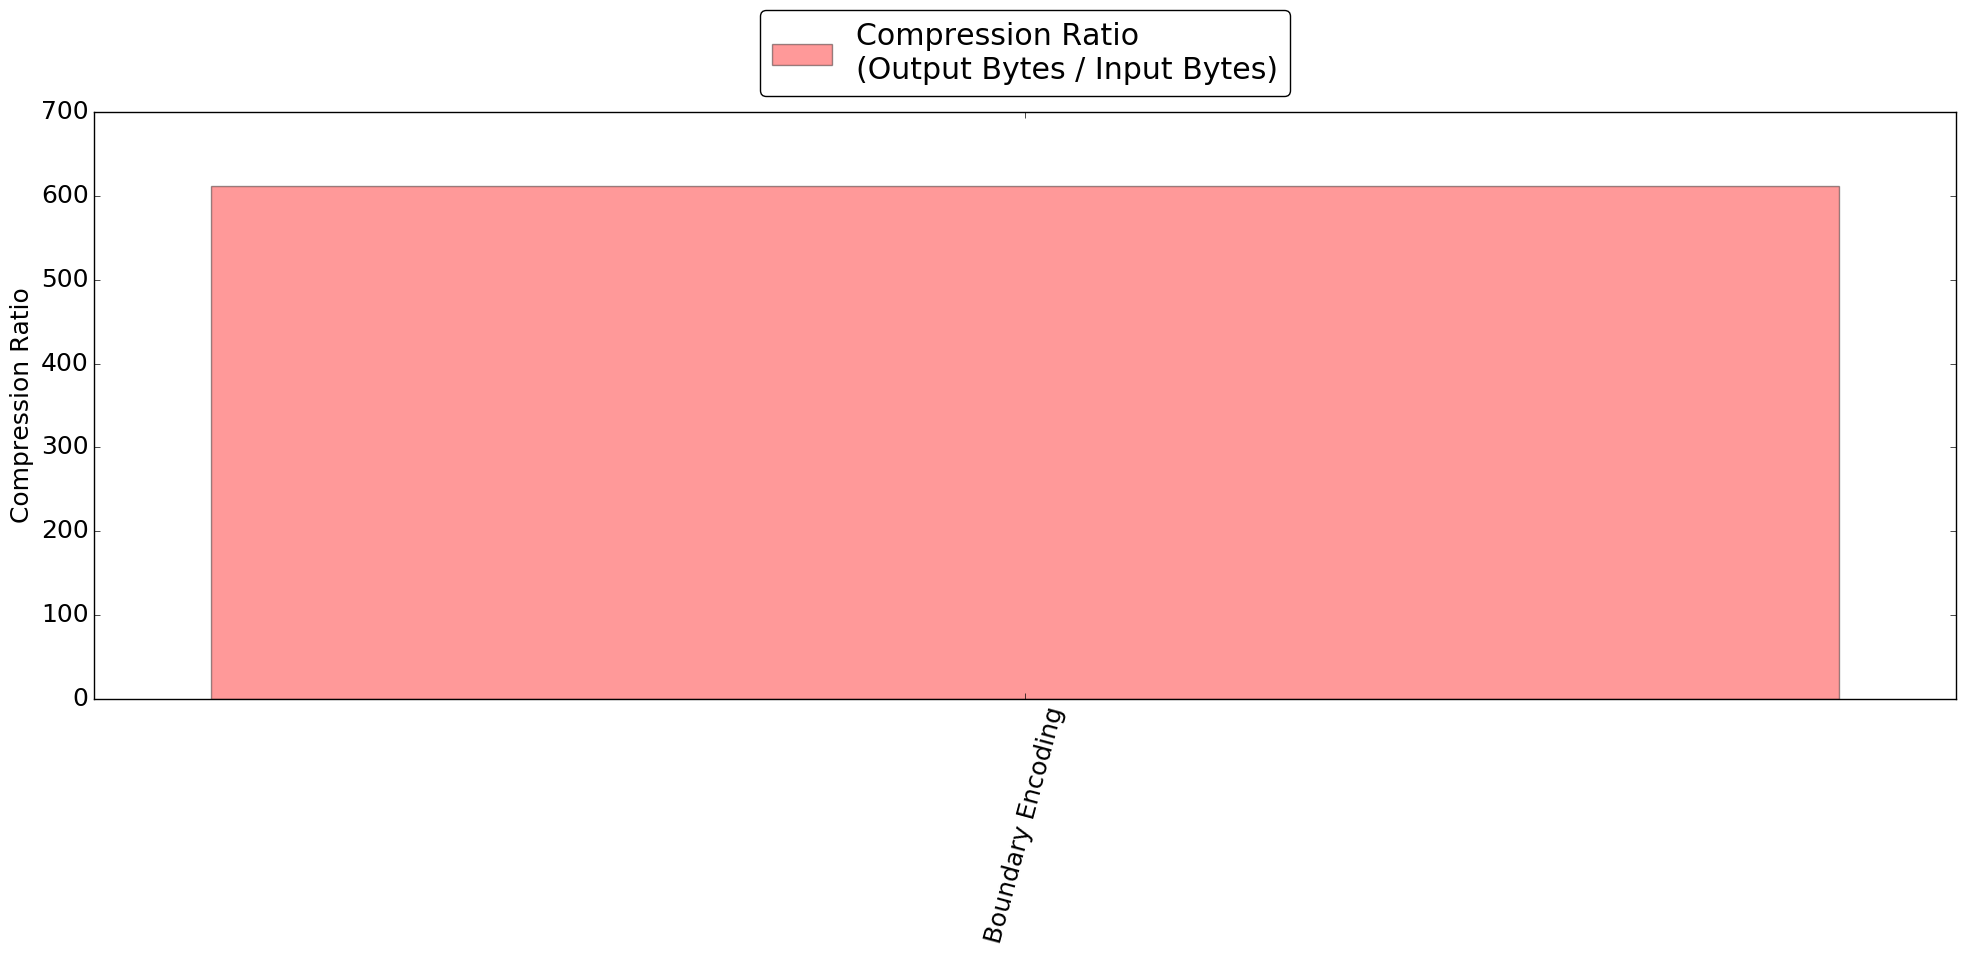

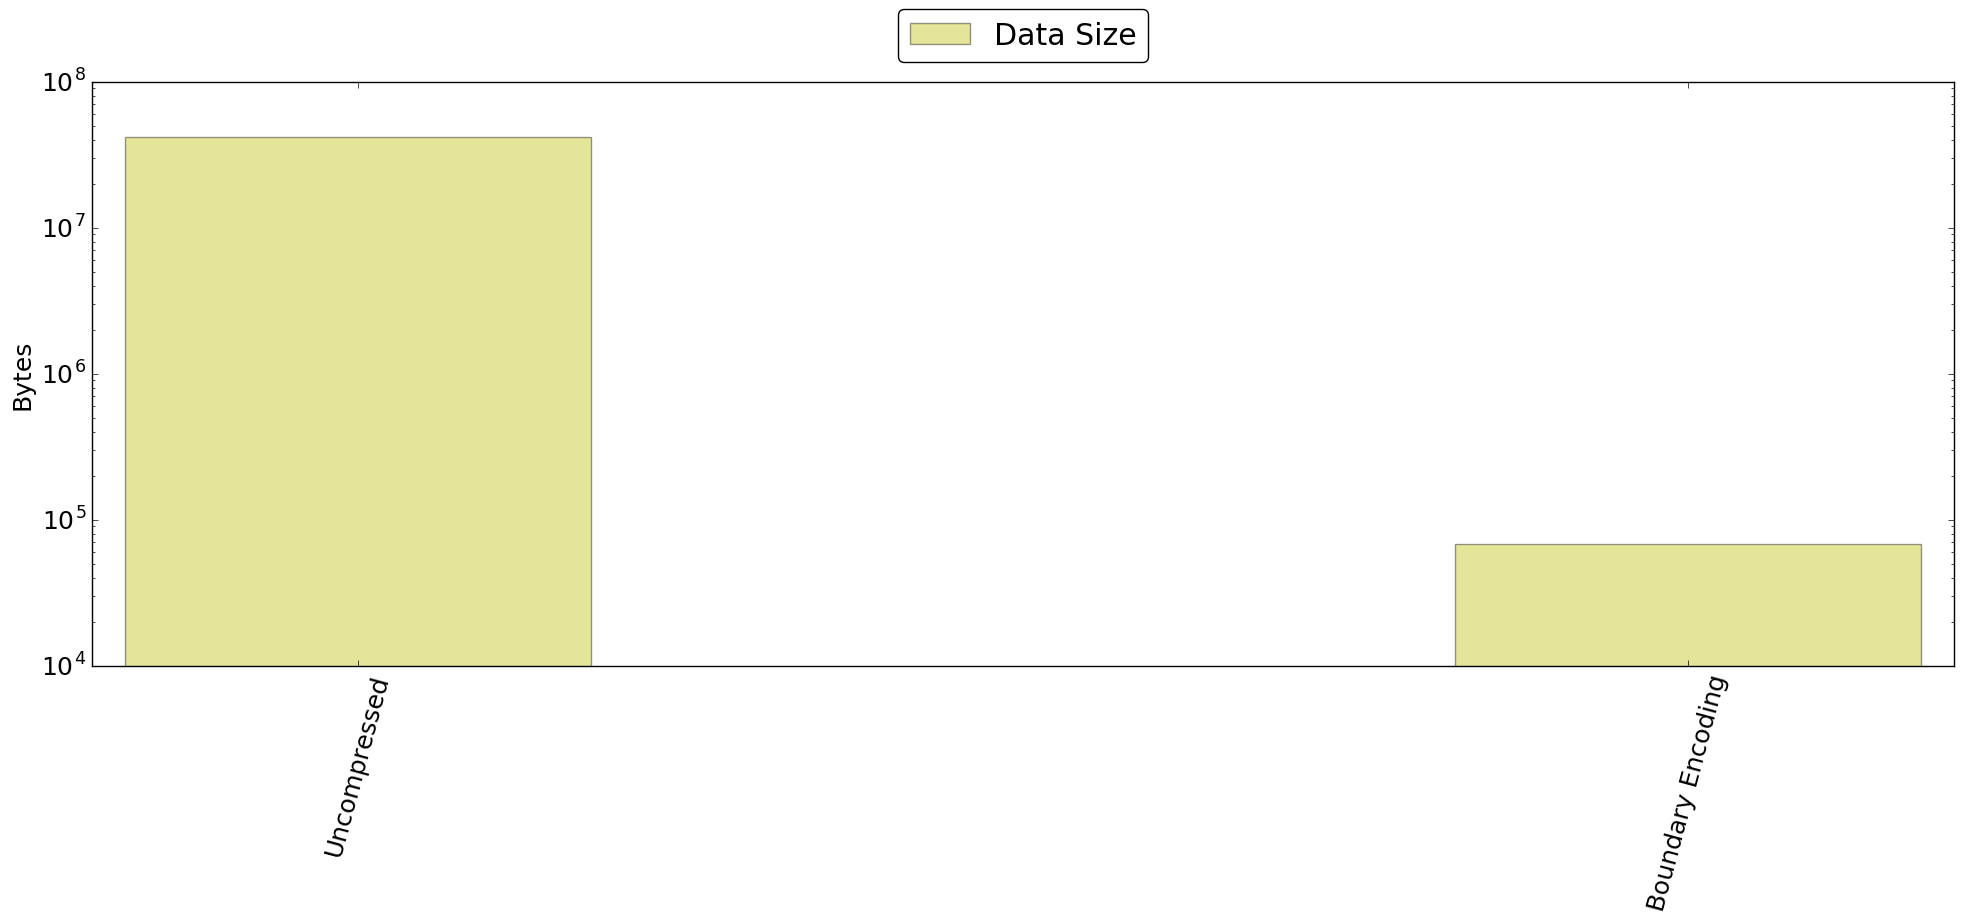

In [9]:
C.Util.plot(
    results['methods'],
    results['bytes'],
    results['ratios'],
    results['total_comp_speed'],
    results['total_comp_speed_std'],
    results['total_decomp_speed'],
    results['total_decomp_speed_std'],
)

In [11]:
C.Util.get_size(C.LZ77.compress(ac3[0]))

60691

In [22]:
original = 'AABCBBABC'
stream, streamSize = lz.Encoder()
lz = C.lz77(stream)


lz = C.lz77(ac3[0].tobytes())
stream, streamSize = lz.Encoder()
print C.Util.get_size(stream)

Encoding...


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()